#**Analyse de données**
# Projet Airbnb
**Par Clara FADDA et Lucas STALTER**


# Importation des bibliothèques


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Importation des données

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/S6/Analyse de données/Projet AirBnB/

#Check the content of the folder
#!ls

df_train=pd.read_csv("airbnb_train.csv")
df_test=pd.read_csv("airbnb_test.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/S6/Analyse de données/Projet AirBnB


# Exploration qualitative des données

**Analyse du fichier**

5 premières lignes du fichier

In [ ]:
df_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


Nombre de données et de colonnes du fichier

In [ ]:
df_train.shape

(22234, 28)

Information sur les types de données

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identity_verified  22178 non-null

In [ ]:
df_train.dtypes

,0
id,int64
log_price,float64
property_type,object
room_type,object
amenities,object
accommodates,int64
bathrooms,float64
bed_type,object
cancellation_policy,object
cleaning_fee,bool


Transformation des types pour l'analyse

In [ ]:
def transformation_types(df):
    # Convertir les colonnes
    df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float) / 100
    df['host_has_profile_pic'] = df['host_has_profile_pic'] == 't'
    df['host_identity_verified'] = df['host_identity_verified'] == 't'
    df['instant_bookable'] = df['instant_bookable'] == 't'
    date_cols = ['first_review', 'host_since', 'last_review']
    for col in date_cols:
      df[col] = pd.to_datetime(df[col], errors='coerce')

transformation_types(df_train)

In [ ]:
df_train.dtypes

,0
id,int64
log_price,float64
property_type,object
room_type,object
amenities,object
accommodates,int64
bathrooms,float64
bed_type,object
cancellation_policy,object
cleaning_fee,bool


Colonnes

In [ ]:
df_train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [ ]:
cat_cols = df_train.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df_train[col].unique()[:10]}")

property_type: ['House' 'Apartment' 'Townhouse' 'Guest suite' 'Condominium' 'Timeshare'
 'Chalet' 'Guesthouse' 'Bungalow' 'Loft']
room_type: ['Private room' 'Entire home/apt' 'Shared room']
amenities: ['{TV,"Wireless Internet",Kitchen,"Free parking on premises","Pets allowed","Suitable for events",Washer,Dryer,"Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron}'
 '{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,"Lock on bedroom door","24-hour check-in","Hair dryer",Iron,"translation missing: en.hosting_amenity_50","Self Check-In",Keypad,"Bed linens",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowed"}'
 '{TV,"Wireless Internet","Air conditioning",Kitchen,"Free parking on premises","Pets allowed","Elevator in building",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon m

Statistiques descriptives

In [ ]:
df_train.describe()

,id,log_price,accommodates,bathrooms,first_review,host_response_rate,host_since,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,2.223400e+04,22234.000000,22234.000000,22183.000000,17509,16759.000000,22178,17518,22234.000000,22234.000000,22234.000000,17256.000000,22208.000000,22199.000000
mean,1.122269e+07,4.783481,3.155573,1.236037,2016-01-15 02:25:44.120166912,0.944864,2014-07-21 19:14:18.688790528,2017-03-15 14:22:02.616737280,38.462971,-92.269305,20.670774,94.069077,1.264769,1.711473
min,3.362000e+03,2.302585,1.000000,0.000000,2009-05-25 00:00:00,0.000000,2008-03-03 00:00:00,2010-07-17 00:00:00,33.339002,-122.510940,0.000000,20.000000,0.000000,0.000000
25%,6.202924e+06,4.317488,2.000000,1.000000,2015-07-01 00:00:00,1.000000,2013-04-24 06:00:00,2017-01-10 00:00:00,34.136082,-118.340633,1.000000,92.000000,1.000000,1.000000
50%,1.217425e+07,4.700480,2.000000,1.000000,2016-05-25 00:00:00,1.000000,2014-09-29 00:00:00,2017-04-28 00:00:00,40.662632,-76.994944,6.000000,96.000000,1.000000,1.000000
75%,1.639502e+07,5.220356,4.000000,1.000000,2017-01-02 00:00:00,1.000000,2015-12-26 00:00:00,2017-09-09 00:00:00,40.746358,-73.954599,23.000000,100.000000,1.000000,2.000000
max,2.120450e+07,7.600402,16.000000,8.000000,2017-10-02 00:00:00,1.000000,2017-10-04 00:00:00,2017-10-05 00:00:00,42.390248,-70.989359,505.000000,100.000000,10.000000,18.000000
std,6.080480e+06,0.718758,2.143870,0.586246,NaN,0.160590,NaN,NaN,3.071679,21.670081,37.183731,7.782235,0.852819,1.254903


**Analyse des variables numériques**

In [ ]:
def variables_numeriques(df):

    numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    if 'id' in numeric_vars:
        numeric_vars.remove('id')  # Exclure la variable id qui n'est pas pertinente

    return numeric_vars

    print(f"VARIABLES NUMÉRIQUES ({len(numeric_vars)}) :")
    print(", ".join(numeric_vars))

variables_numeriques(df_train)

['log_price',
 'accommodates',
 'bathrooms',
 'host_response_rate',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

Distribution du log_price

Text(0.5, 0, 'log_price')

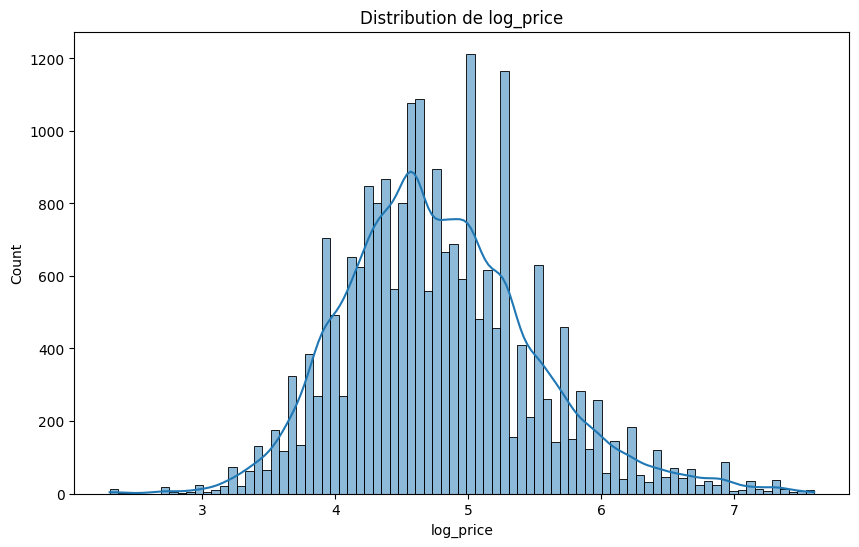

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['log_price'], kde=True)
plt.title('Distribution de log_price')
plt.xlabel('log_price')

Corrélation des variables numériques avec log_price

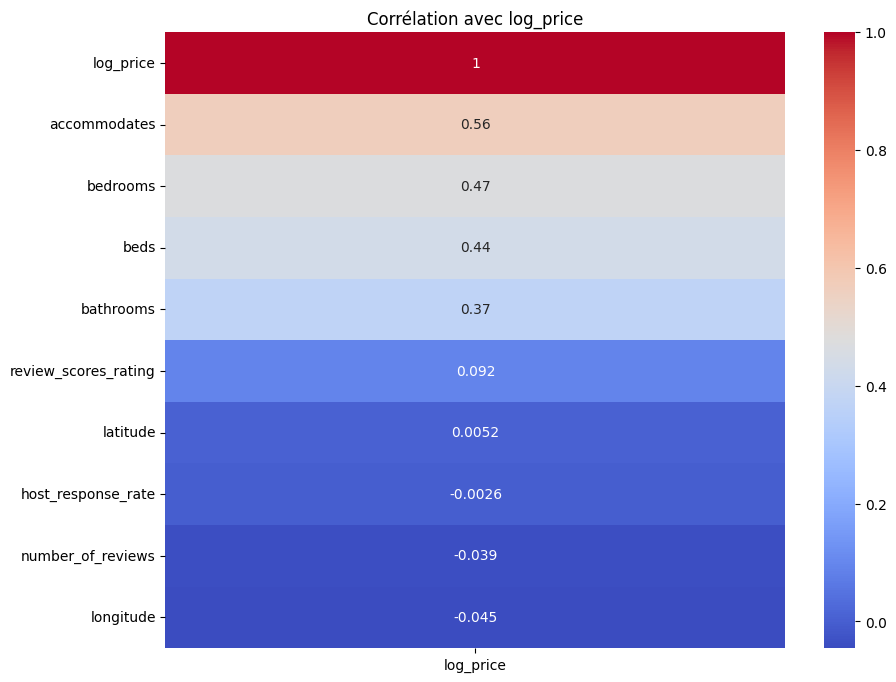

In [ ]:
num_vars=df_train[variables_numeriques(df_train)]
correlations = num_vars.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations[['log_price']].sort_values(by='log_price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Corrélation avec log_price")
plt.show()

Corrélation des variables numériques entre elles


Text(0.5, 1.0, 'Matrice de corrélation des variables numériques')

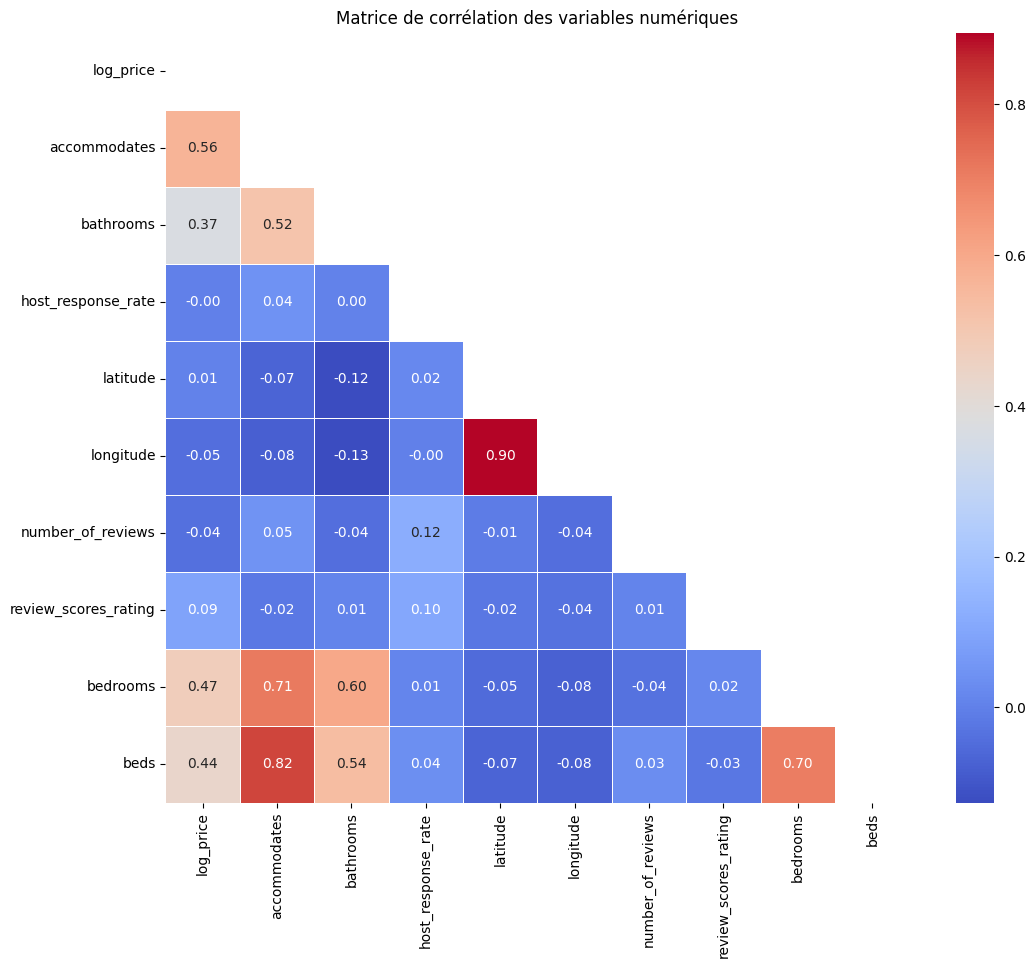

In [ ]:
corr_matrix = num_vars.corr()


plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation des variables numériques')

Satistiques sur le prix

In [ ]:
df_train['price'] = np.exp(df_train['log_price'])

stats_prix = {
        'Moyenne': df_train['price'].mean(),
        'Médiane': df_train['price'].median(),
        'Écart-type': df_train['price'].std(),
        'Min': df_train['price'].min(),
        'Max': df_train['price'].max(),
        'Q1 (25%)': df_train['price'].quantile(0.25),
        'Q3 (75%)': df_train['price'].quantile(0.75)}
for stat, value in stats_prix.items():
        print(f"{stat}: {value:.2f}€")

Moyenne: 160.97€
Médiane: 110.00€
Écart-type: 170.38€
Min: 10.00€
Max: 1999.00€
Q1 (25%): 75.00€
Q3 (75%): 185.00€


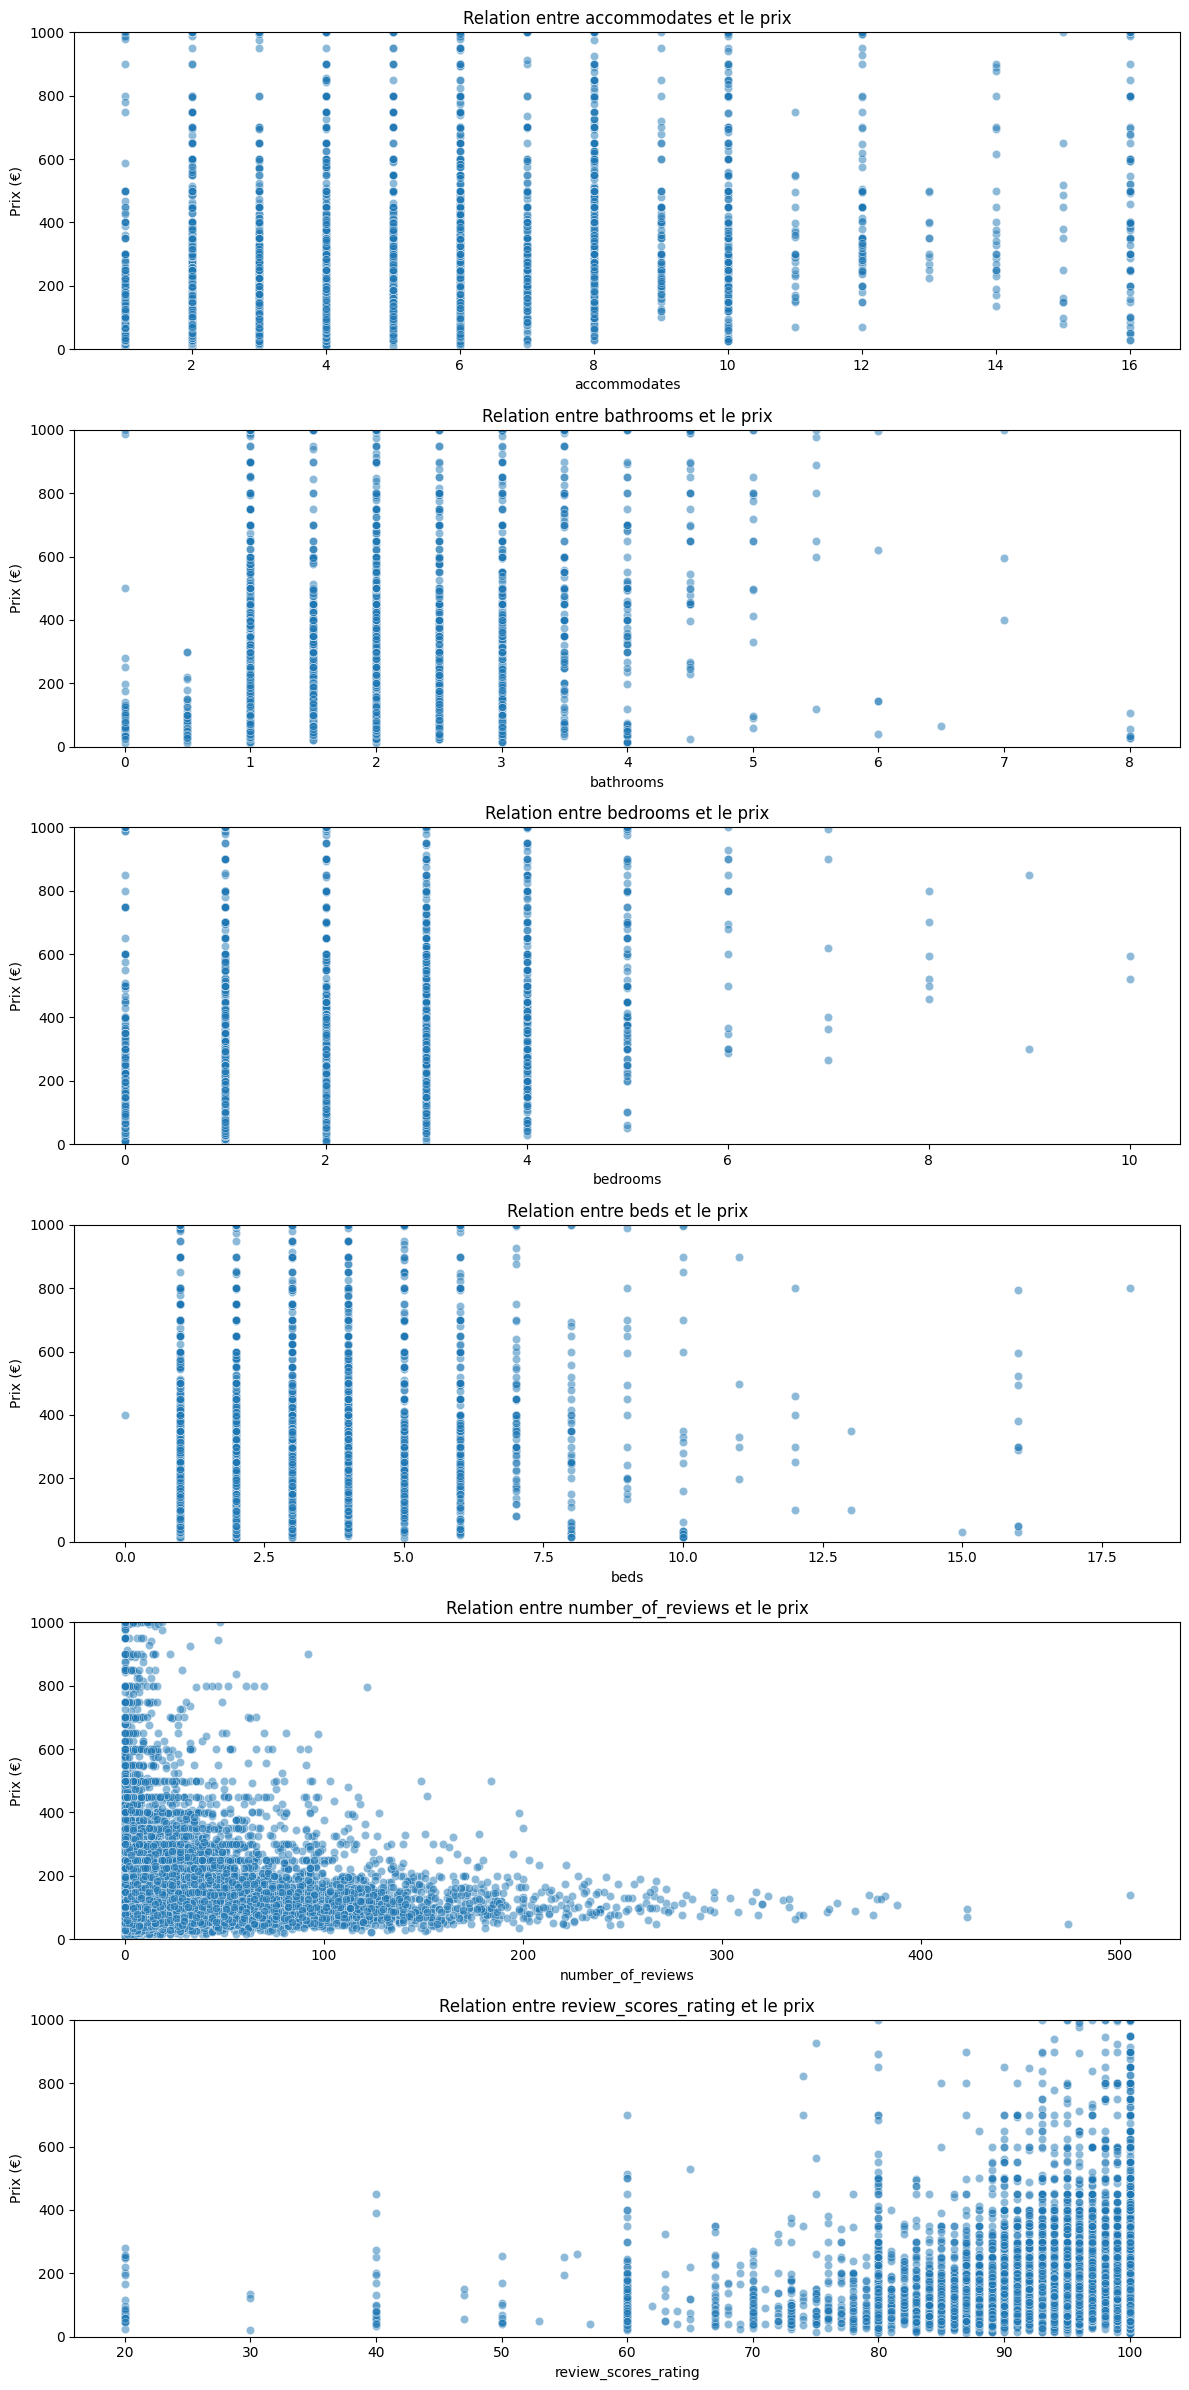

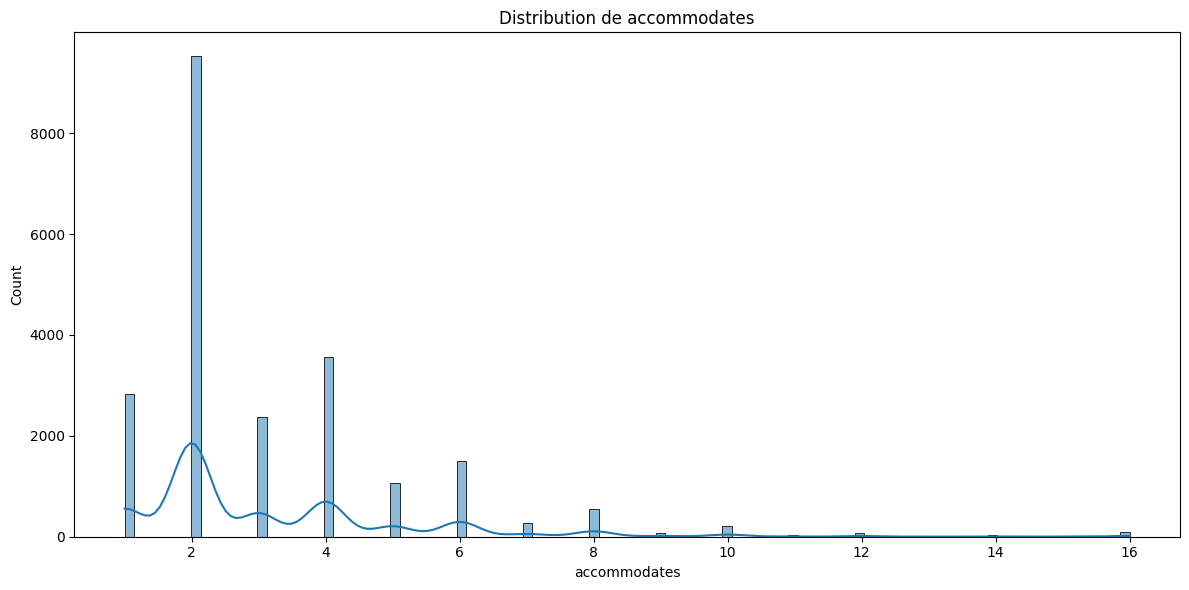

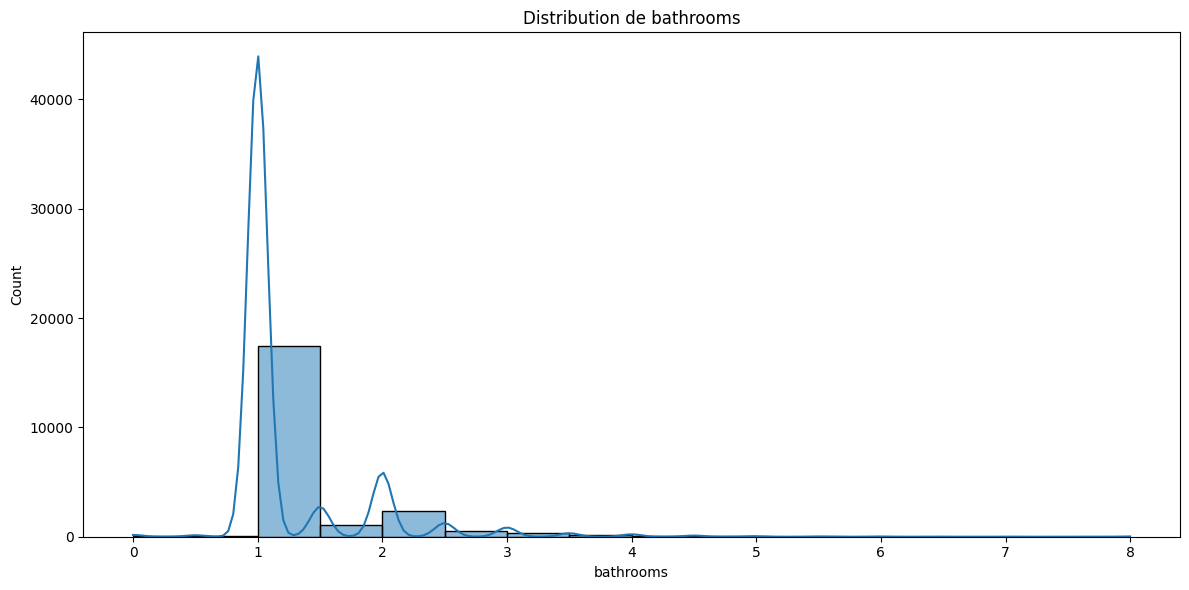

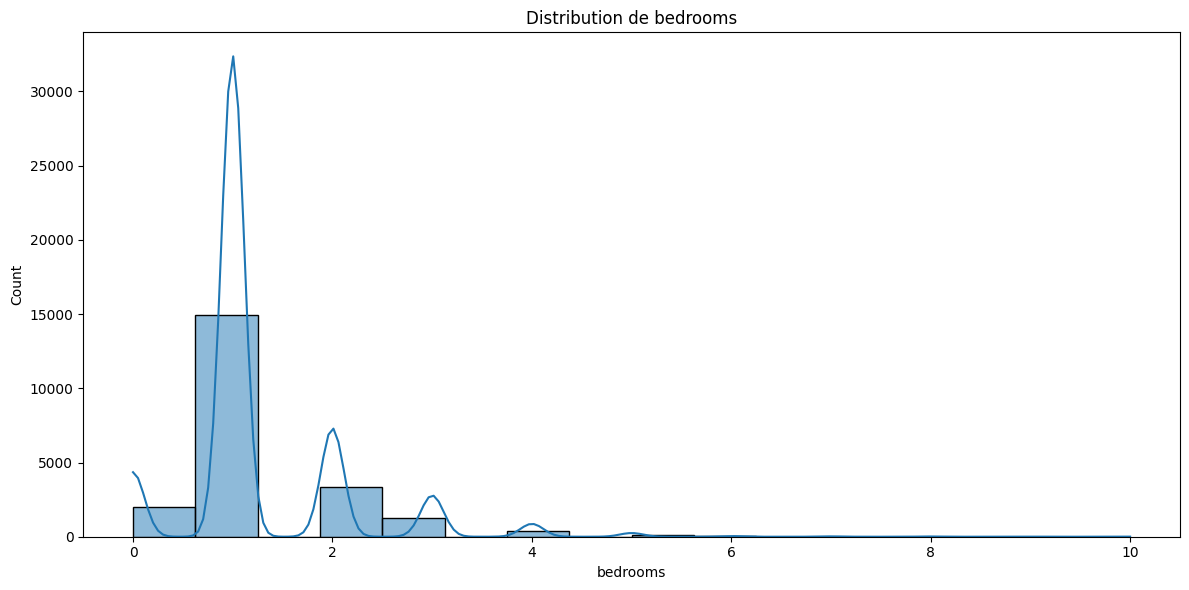

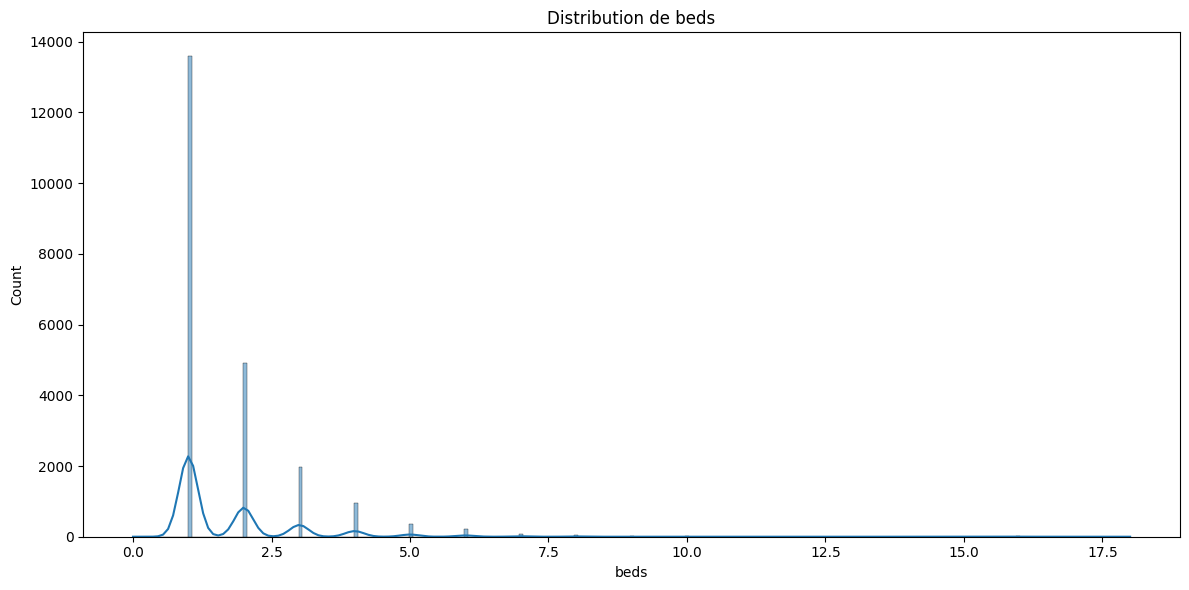

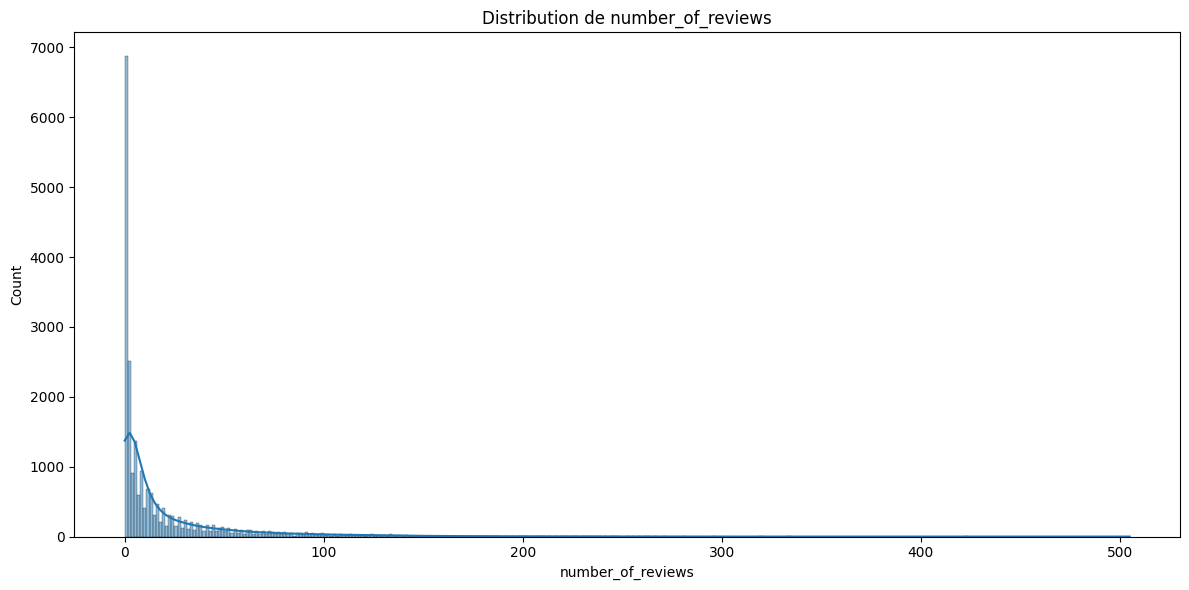

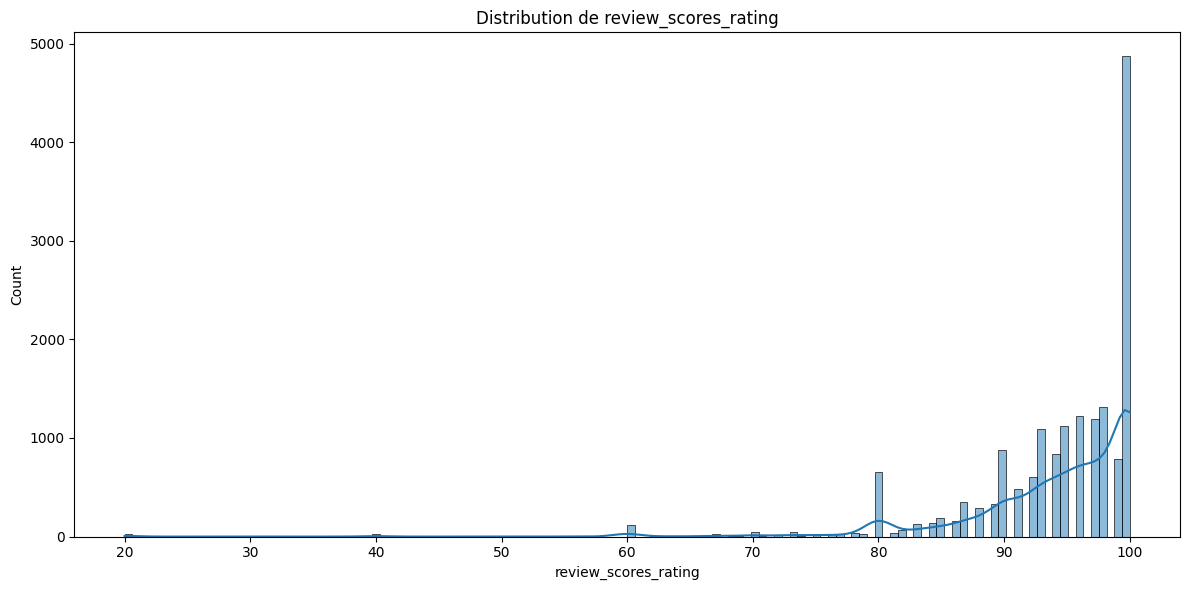

In [ ]:
def analyser_variables_numeriques(df):
    num_vars = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating']


    # Relation entre variables numériques et prix
    fig, axes = plt.subplots(len(num_vars), 1, figsize=(12, 4*len(num_vars)))

    for i, var in enumerate(num_vars):
        if var in df.columns:
            sns.scatterplot(x=var, y='price', data=df, alpha=0.5, ax=axes[i])
            axes[i].set_title(f'Relation entre {var} et le prix')
            axes[i].set_ylabel('Prix (€)')
            axes[i].set_ylim(0, 1000)  # Limiter pour une meilleure visualisation

    plt.tight_layout()
    plt.show()

    # Distribution des variables numériques
    for var in num_vars:
        if var in df.columns:
            plt.figure(figsize=(12, 6))
            sns.histplot(df[var].dropna(), kde=True)
            plt.title(f'Distribution de {var}')
            plt.tight_layout()
            plt.show()

analyser_variables_numeriques(df_train)

**Analyse des variables catégorielles**

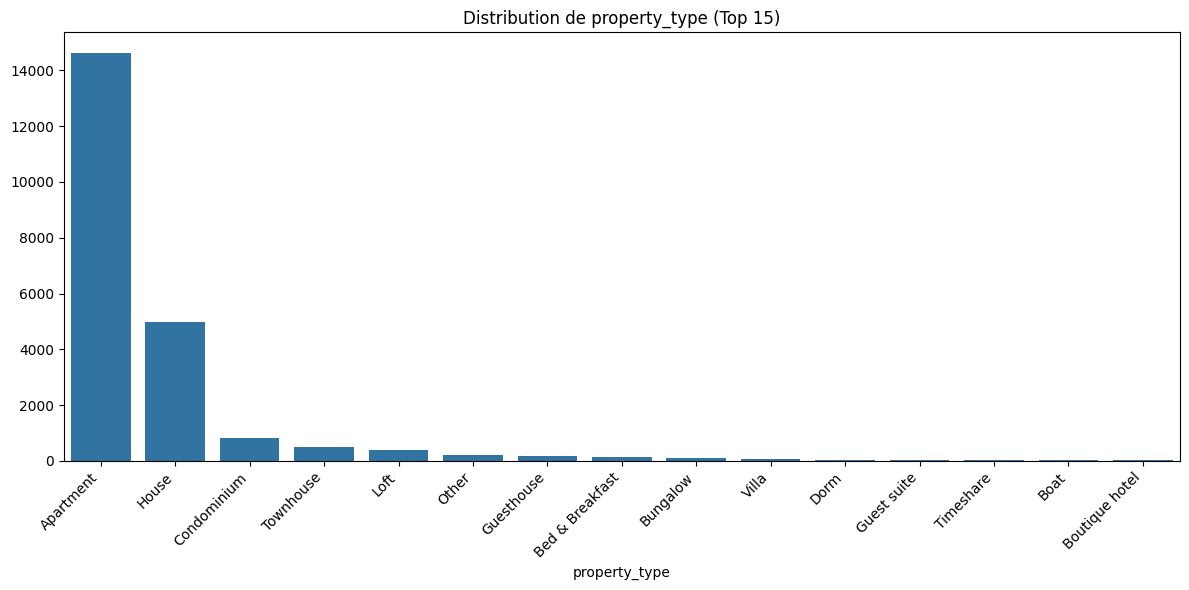

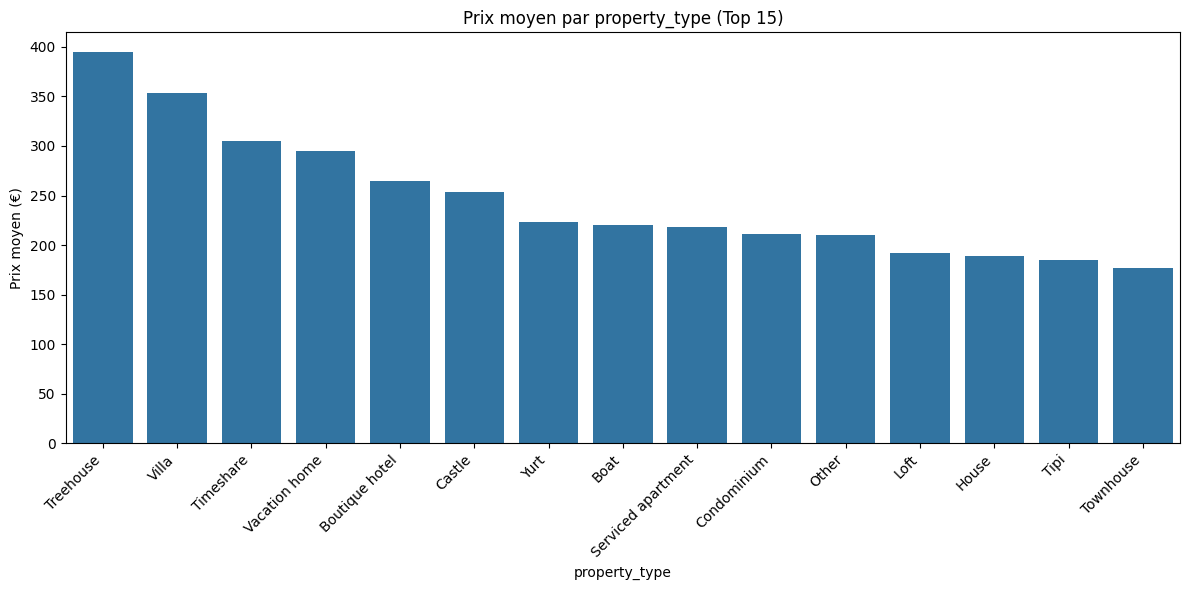

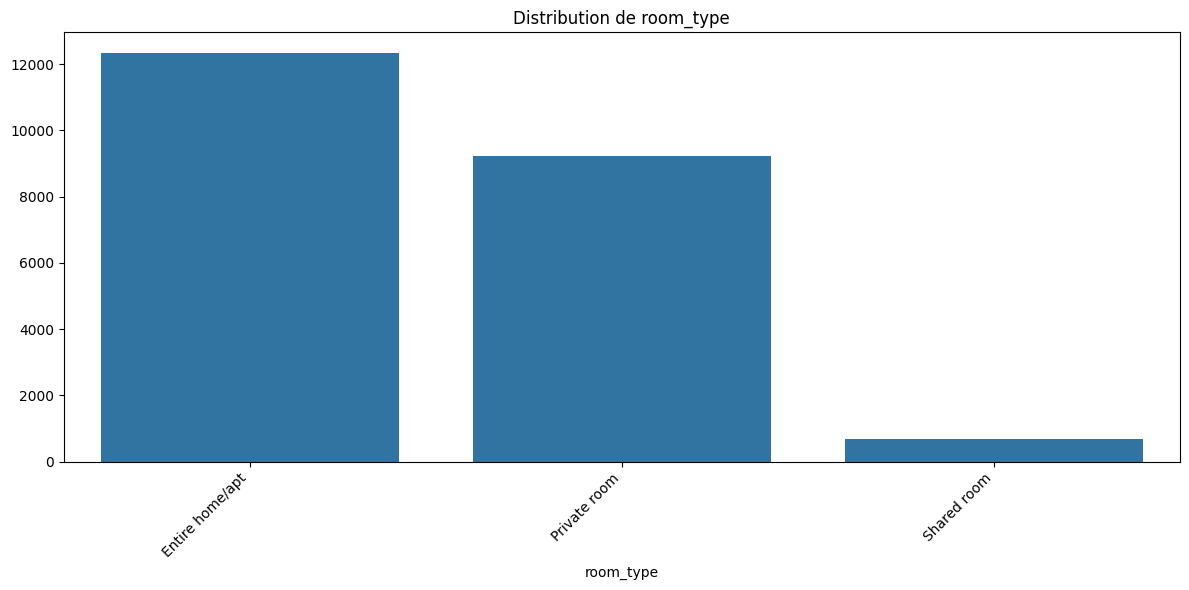

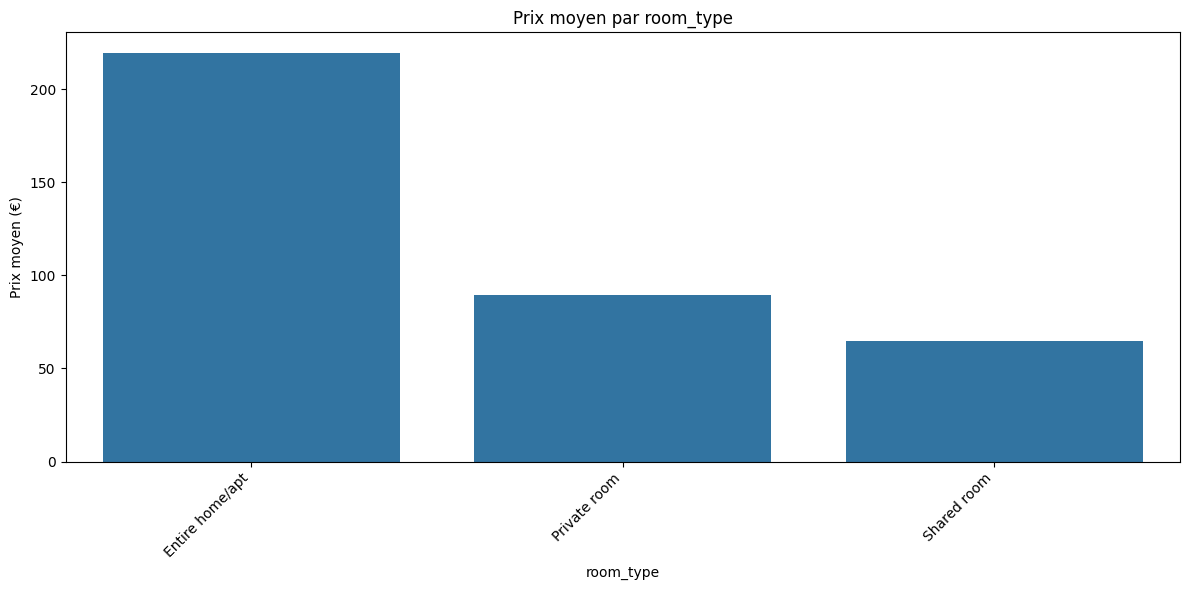

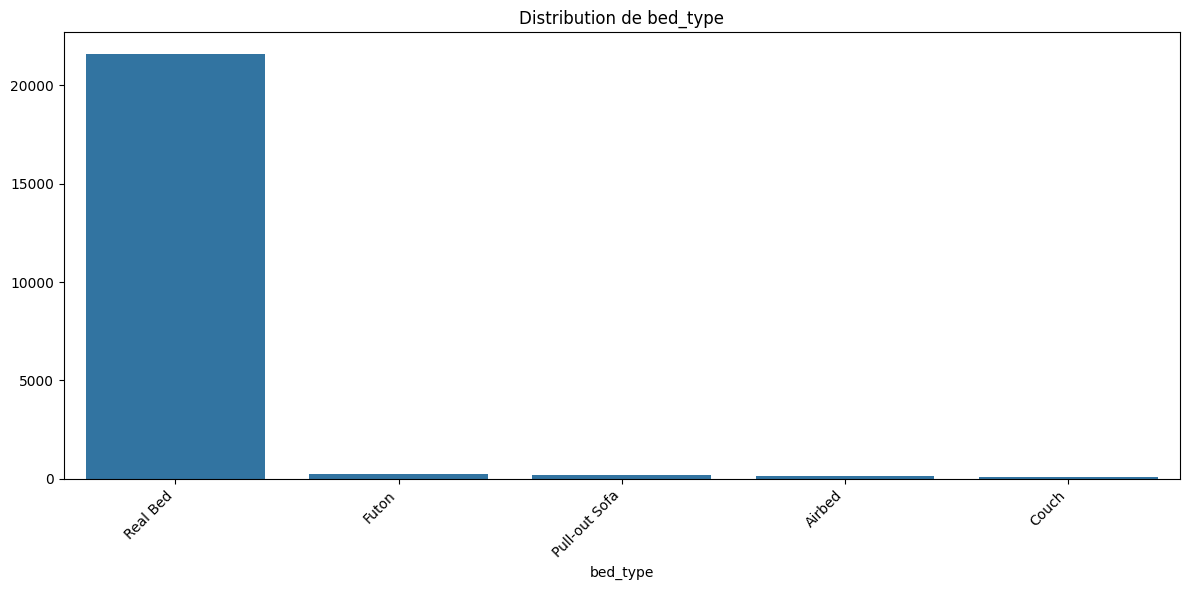

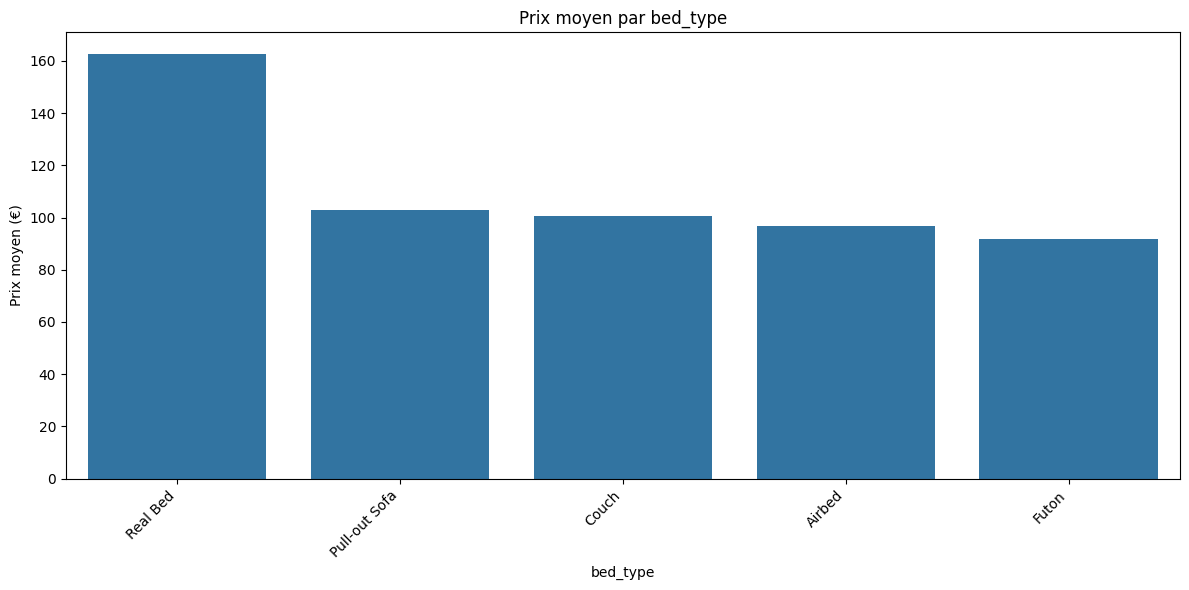

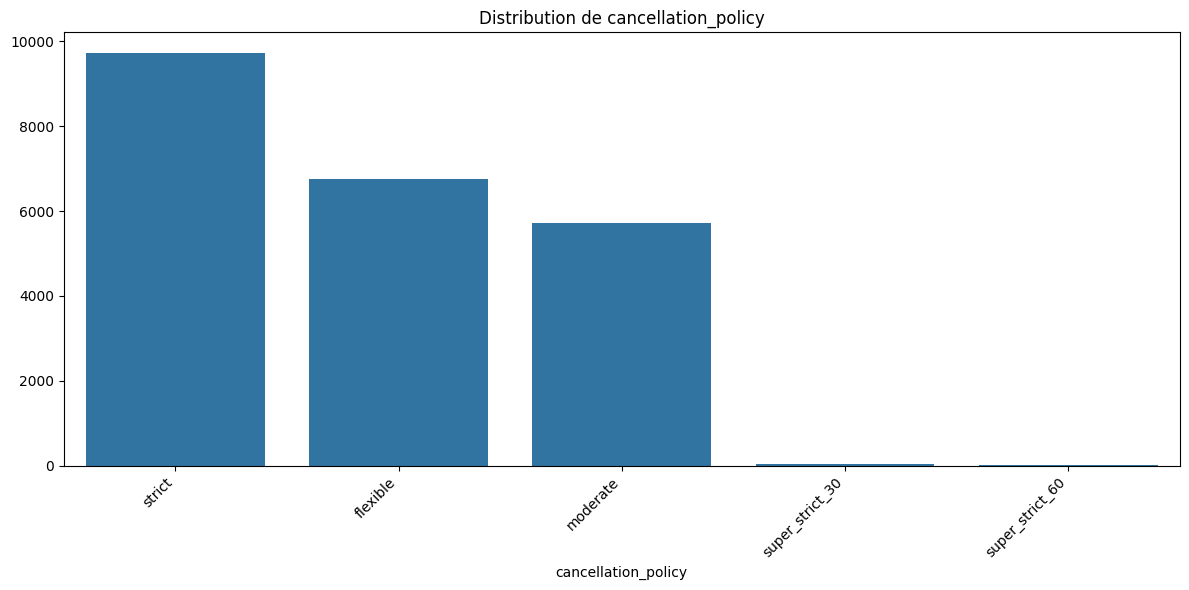

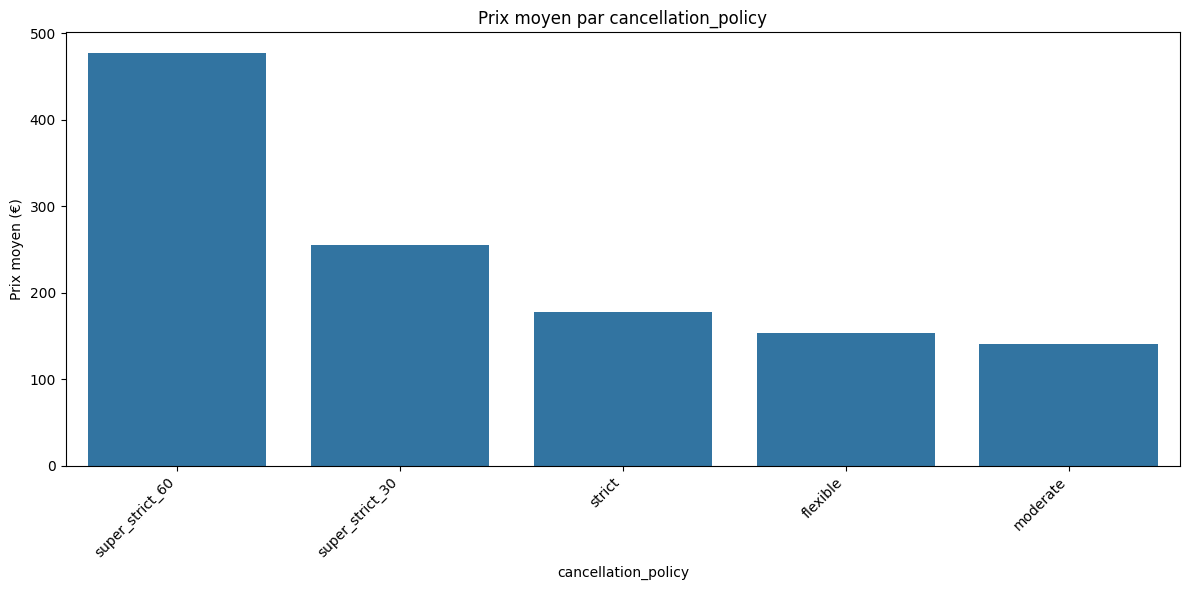

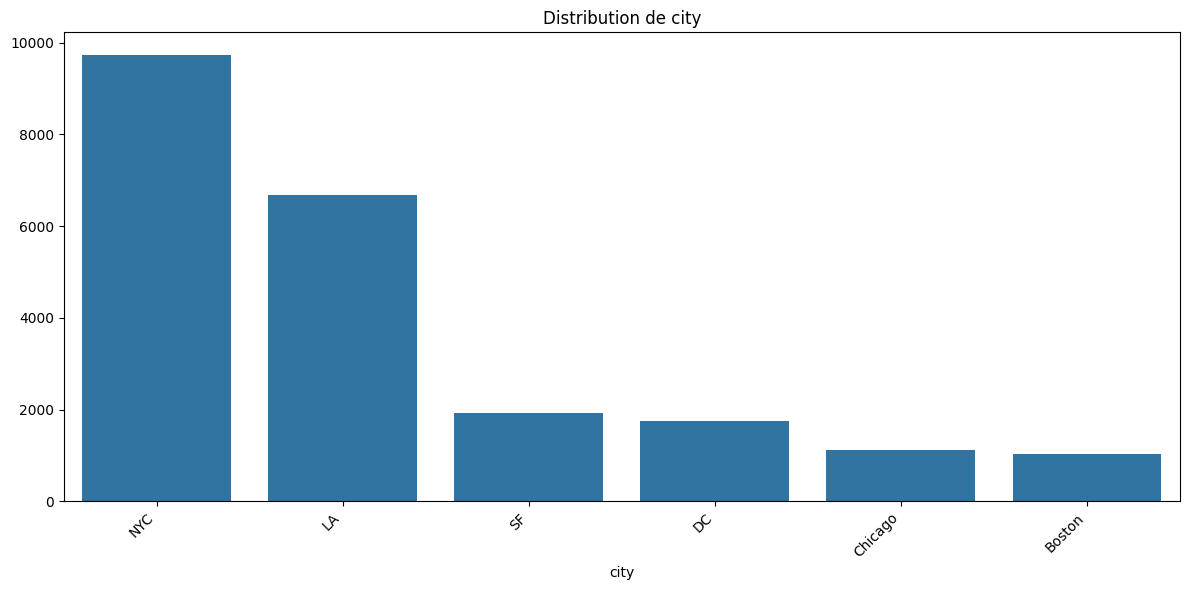

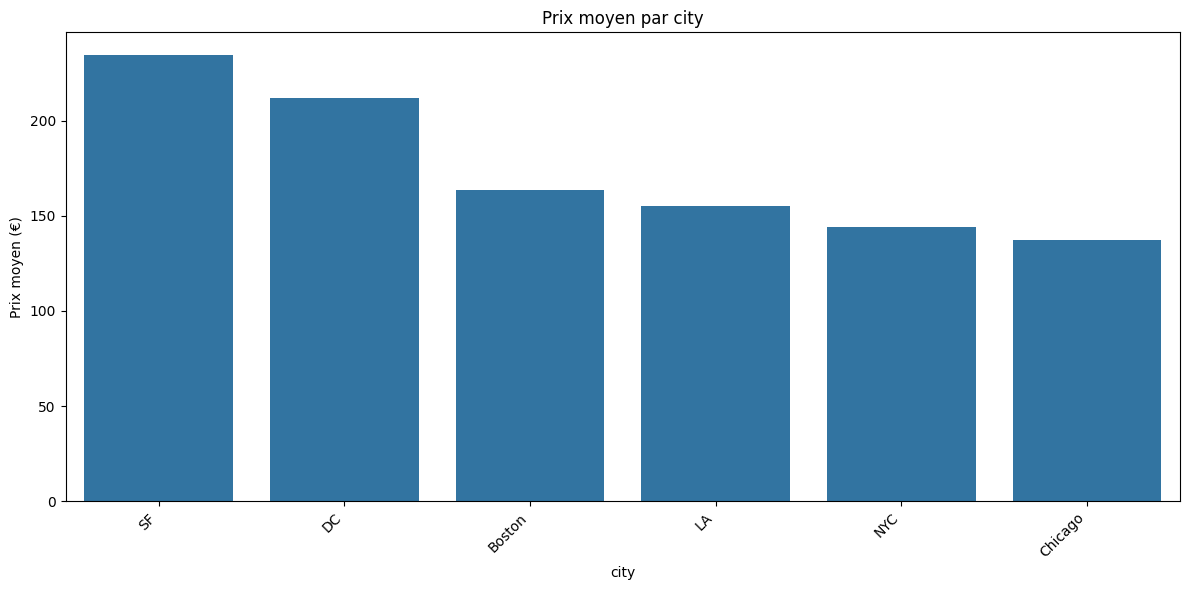

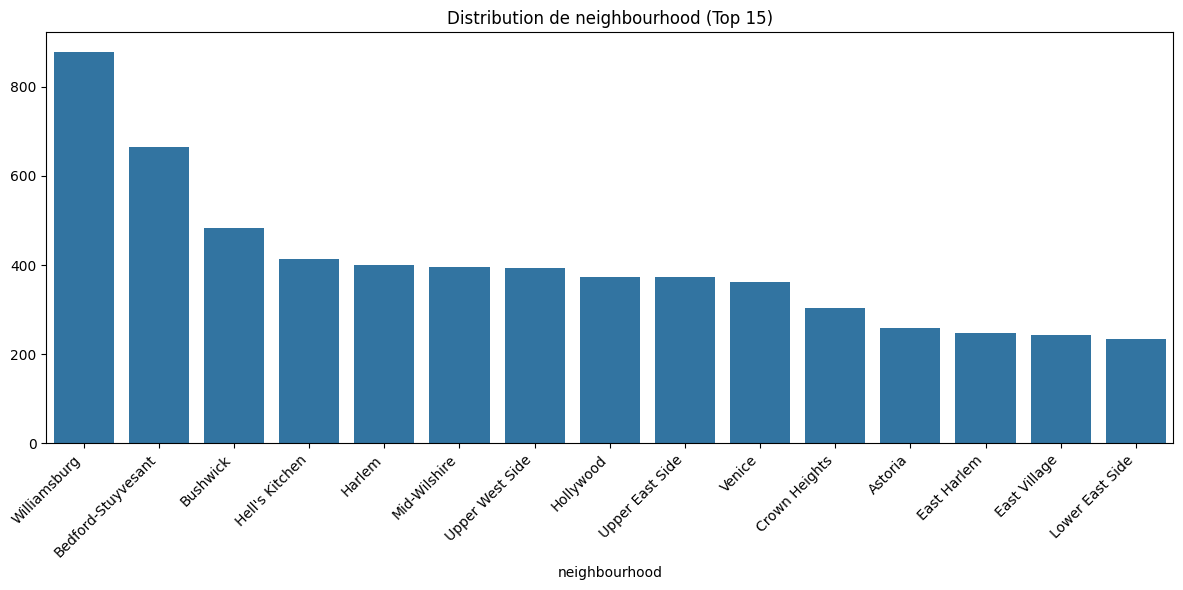

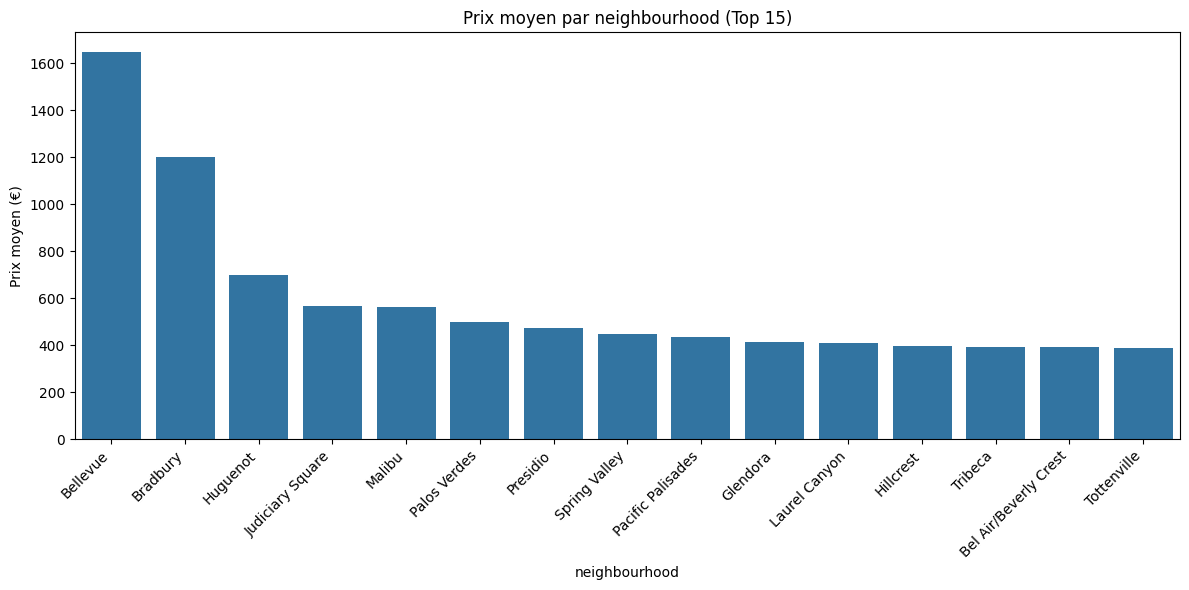

In [ ]:
def analyser_variables_categorielles(df):
    cat_vars = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city' , 'neighbourhood'] #'description'

    for var in cat_vars:
        if var in df.columns:
            plt.figure(figsize=(12, 6))

            # Distribution des valeurs
            value_counts = df[var].value_counts().sort_values(ascending=False)

            # Limiter à top 15 pour la lisibilité
            if len(value_counts) > 15:
                value_counts = value_counts.head(15)
                title_suffix = " (Top 15)"
            else:
                title_suffix = ""

            ax = sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.title(f'Distribution de {var}{title_suffix}')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

            # Prix moyen par catégorie
            plt.figure(figsize=(12, 6))
            prix_moyen = df.groupby(var)['price'].mean().sort_values(ascending=False)

            # Limiter à top 15 pour la lisibilité
            if len(prix_moyen) > 15:
                prix_moyen = prix_moyen.head(15)
                title_suffix = " (Top 15)"
            else:
                title_suffix = ""

            ax = sns.barplot(x=prix_moyen.index, y=prix_moyen.values)
            plt.title(f'Prix moyen par {var}{title_suffix}')
            plt.xticks(rotation=45, ha='right')
            plt.ylabel('Prix moyen (€)')
            plt.tight_layout()
            plt.show()


analyser_variables_categorielles(df_train)

Analyse des amenities

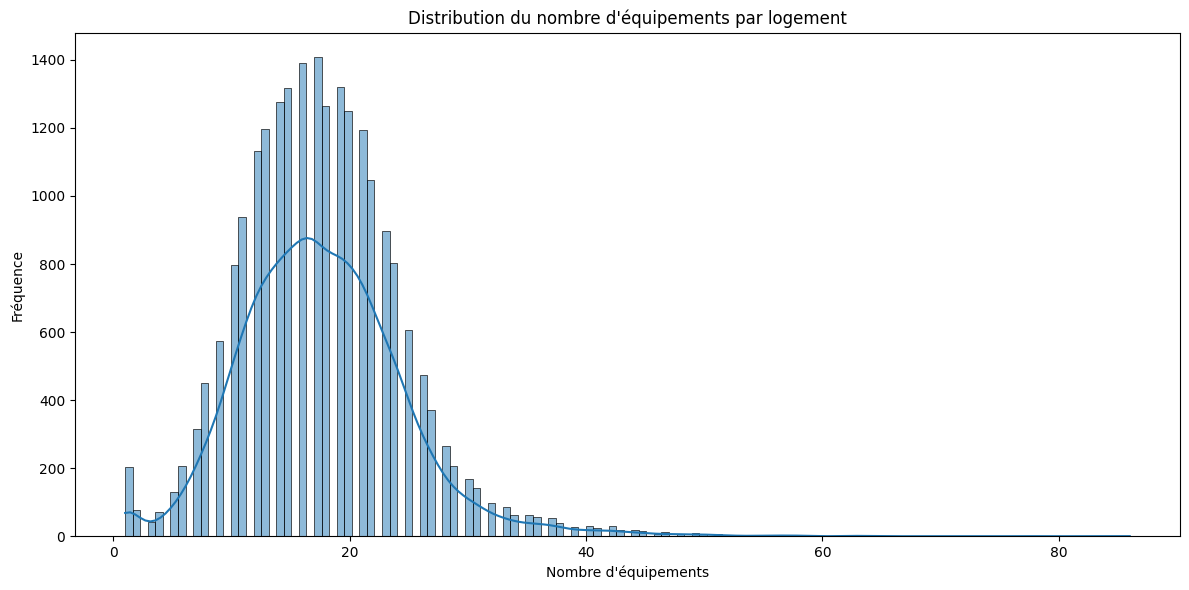

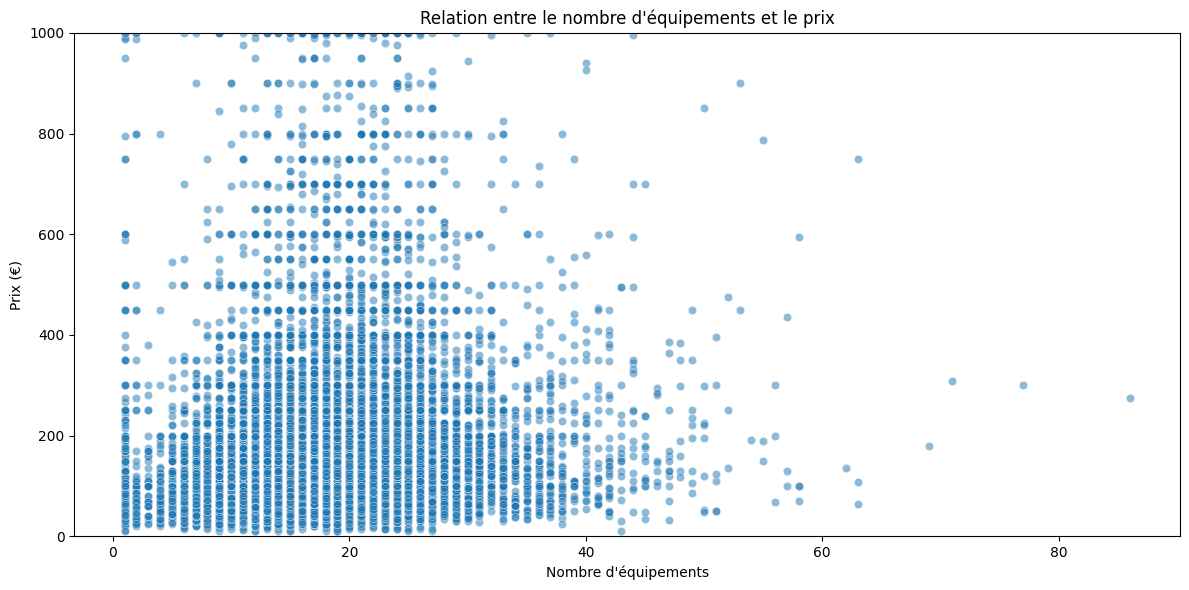

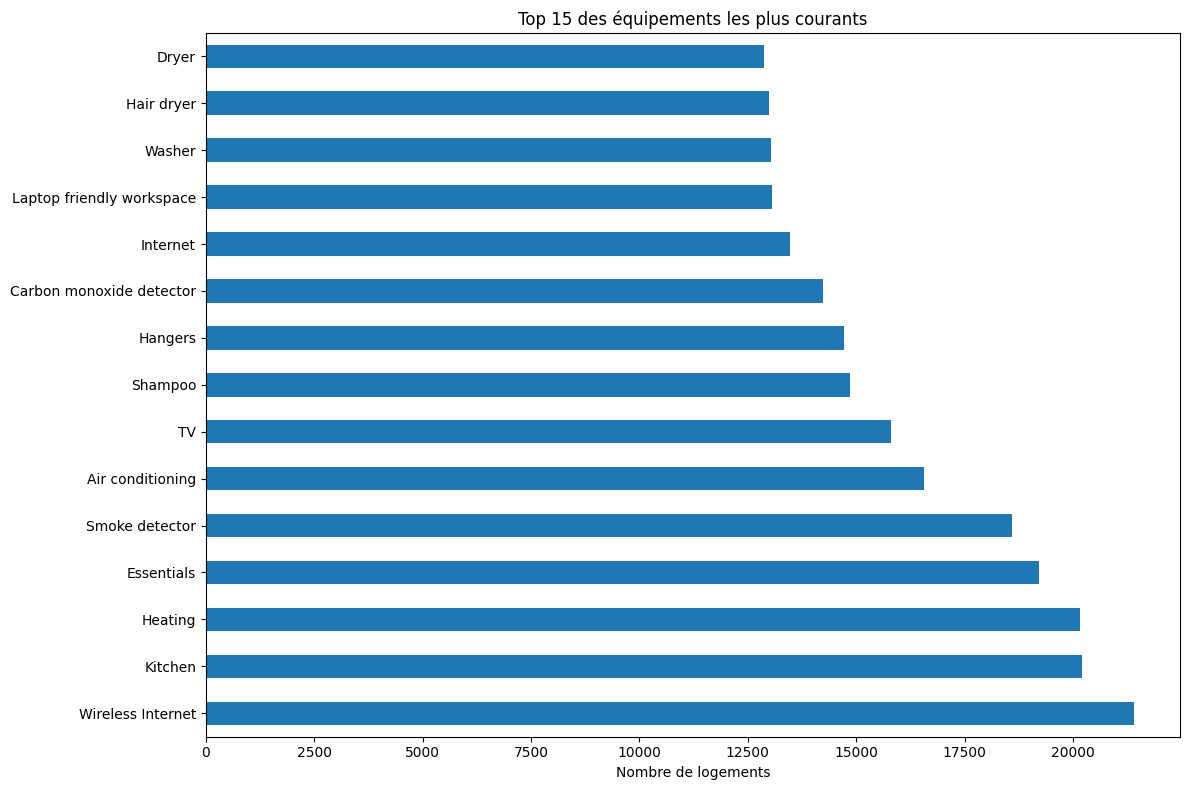

In [ ]:
def analyser_amenities(df):
    # Convertir la chaîne amenities en liste
    df['amenities_list'] = df['amenities'].fillna('').str.replace('{', '').str.replace('}', '').str.replace('"', '').str.split(',')

    # Compter le nombre d'amenities par logement
    df['amenities_count'] = df['amenities_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)

    plt.figure(figsize=(12, 6))
    sns.histplot(df['amenities_count'], kde=True)
    plt.title('Distribution du nombre d\'équipements par logement')
    plt.xlabel('Nombre d\'équipements')
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()

    # Relation entre nombre d'amenities et prix
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='amenities_count', y='price', data=df, alpha=0.5)
    plt.title('Relation entre le nombre d\'équipements et le prix')
    plt.xlabel('Nombre d\'équipements')
    plt.ylabel('Prix (€)')
    plt.ylim(0, 1000)  # Limiter pour une meilleure visualisation
    plt.tight_layout()
    plt.show()

    # Top amenities
    all_amenities = []
    for amenities_list in df['amenities_list']:
        if isinstance(amenities_list, list):
            all_amenities.extend(amenities_list)

    amenities_counts = pd.Series(all_amenities).value_counts()

    plt.figure(figsize=(12, 8))
    amenities_counts.head(15).plot(kind='barh')
    plt.title('Top 15 des équipements les plus courants')
    plt.xlabel('Nombre de logements')
    plt.tight_layout()
    plt.show()

analyser_amenities(df_train)

Analyse des review_score

<Figure size 1200x600 with 0 Axes>

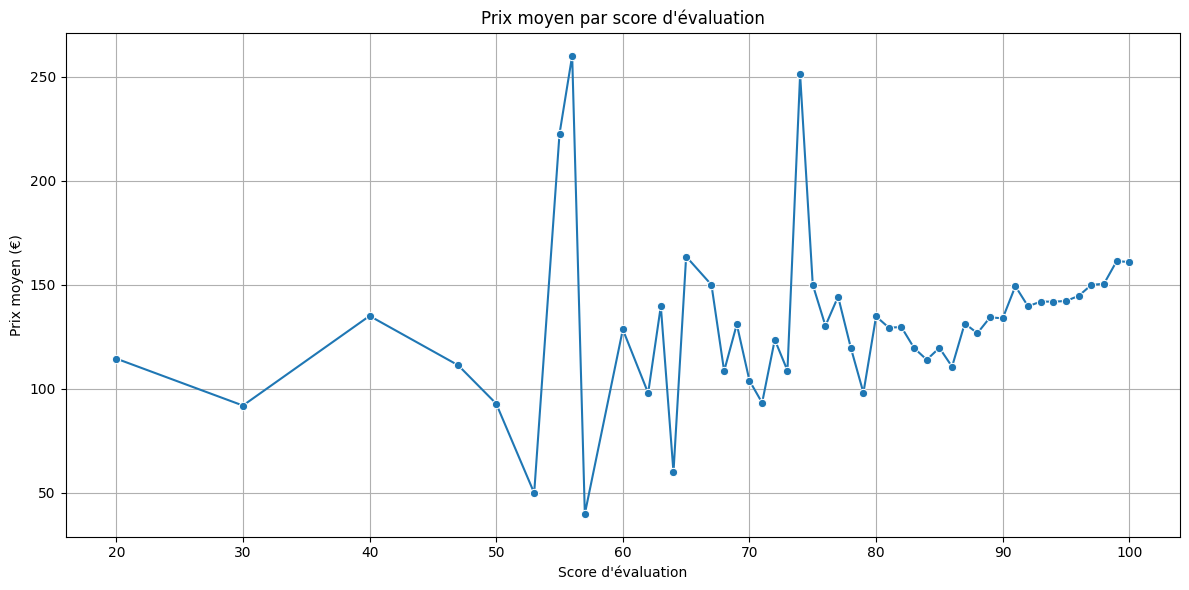

In [ ]:
def analyser_reviews(df):
    if 'review_scores_rating' in df.columns and 'price' in df.columns:
        # Relation entre score et prix
        plt.figure(figsize=(12, 6))

        # Arrondir les scores pour une meilleure visualisation
        df['review_score_rounded'] = round(df['review_scores_rating'] * 2) / 2

        # Prix moyen par score
        plt.figure(figsize=(12, 6))
        score_prices = df.groupby('review_score_rounded')['price'].mean().sort_index()
        sns.lineplot(x=score_prices.index, y=score_prices.values, marker='o')
        plt.title('Prix moyen par score d\'évaluation')
        plt.xlabel('Score d\'évaluation')
        plt.ylabel('Prix moyen (€)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

analyser_reviews(df_train)

**Analyse des données temporelles**

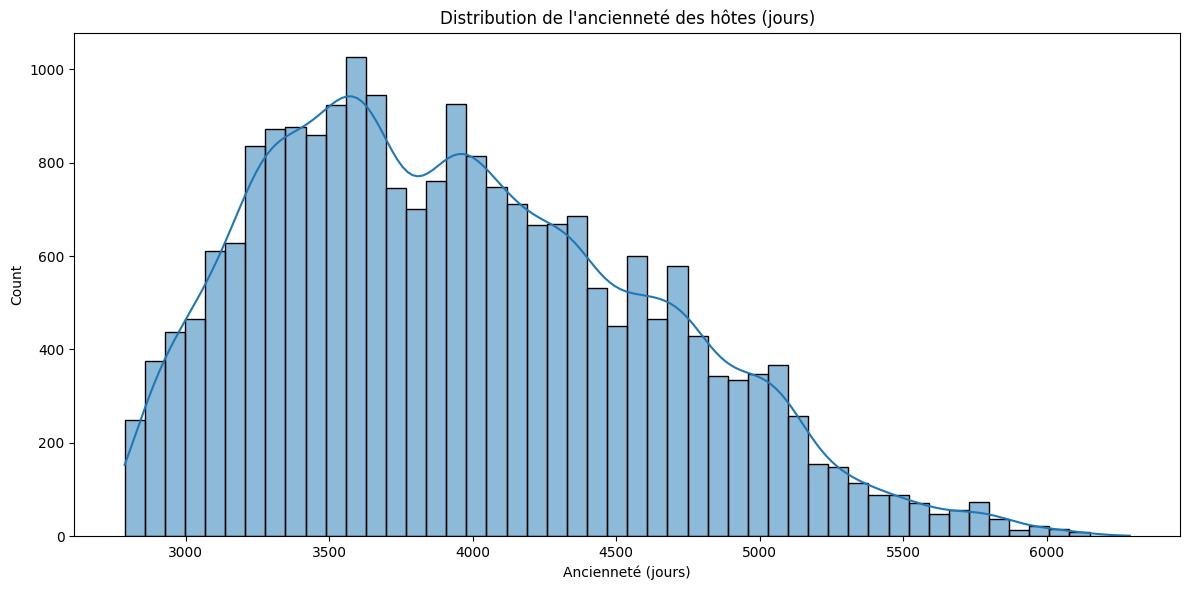

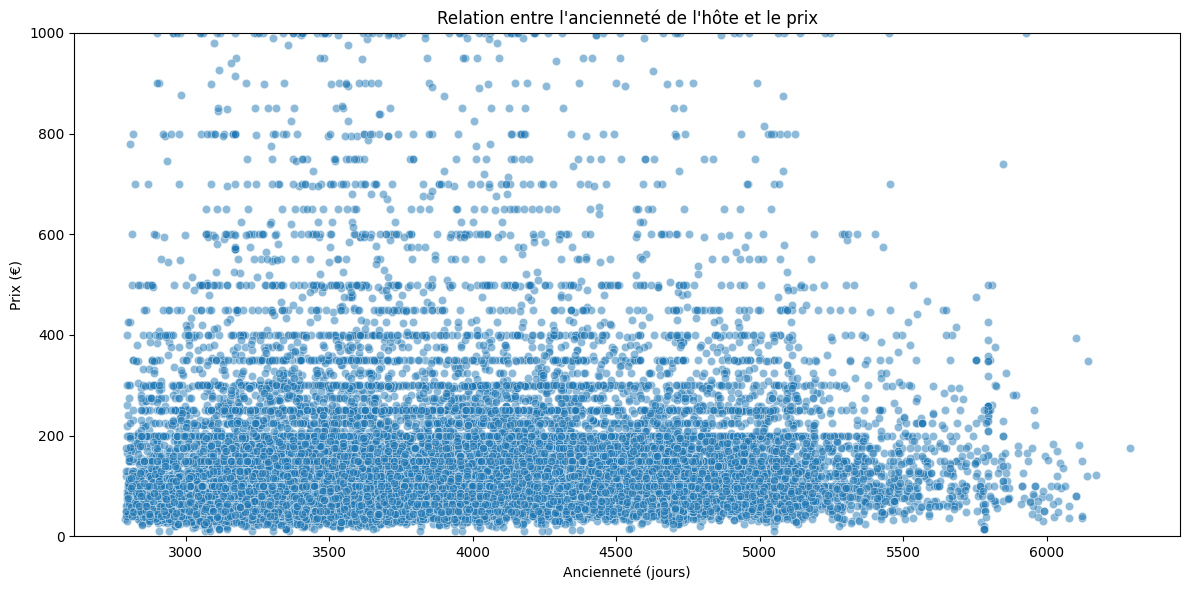

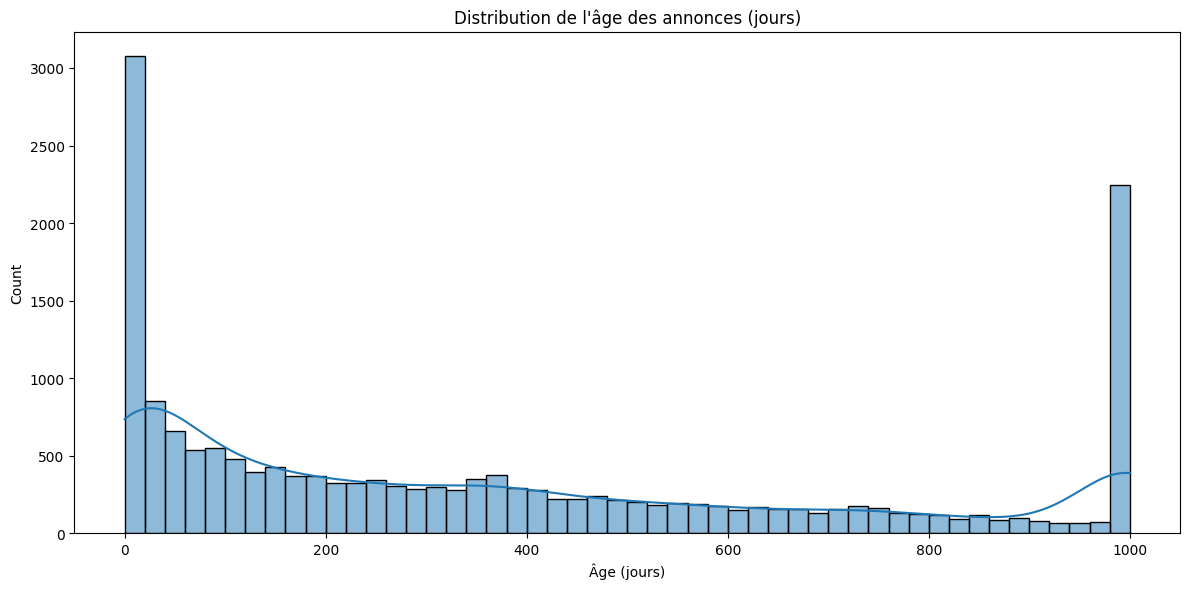

In [ ]:
def analyser_variables_temporelles(df):
    # Convertir les dates en datetime
    for col in ['first_review', 'last_review', 'host_since']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    if 'host_since' in df.columns:
        # Ancienneté de l'hôte
        df['host_age_days'] = (pd.Timestamp.now() - df['host_since']).dt.days

        plt.figure(figsize=(12, 6))
        sns.histplot(df['host_age_days'].dropna(), kde=True, bins=50)
        plt.title('Distribution de l\'ancienneté des hôtes (jours)')
        plt.xlabel('Ancienneté (jours)')
        plt.tight_layout()
        plt.show()

        # Relation entre ancienneté et prix
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='host_age_days', y='price', data=df, alpha=0.5)
        plt.title('Relation entre l\'ancienneté de l\'hôte et le prix')
        plt.xlabel('Ancienneté (jours)')
        plt.ylabel('Prix (€)')
        plt.ylim(0, 1000)  # Limiter pour une meilleure visualisation
        plt.tight_layout()
        plt.show()

    if 'first_review' in df.columns and 'last_review' in df.columns:
        # Âge de l'annonce (en jours)
        df['listing_age_days'] = (df['last_review'] - df['first_review']).dt.days

        plt.figure(figsize=(12, 6))
        sns.histplot(df['listing_age_days'].dropna().clip(upper=1000), kde=True, bins=50)
        plt.title('Distribution de l\'âge des annonces (jours)')
        plt.xlabel('Âge (jours)')
        plt.tight_layout()
        plt.show()

analyser_variables_temporelles(df_train)

**Analyse des données booléennes**

<ipython-input-353-d34bfc3a397f>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Non', 'Oui'])


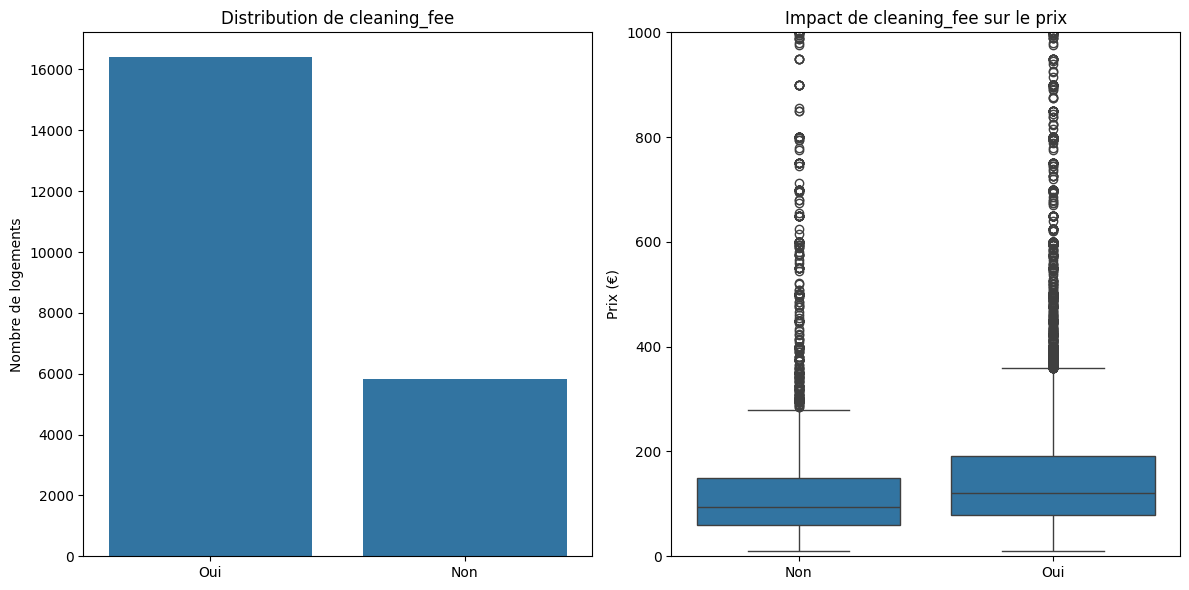


--- Prix moyen selon cleaning_fee ---
cleaning_fee = False: 152.69€
cleaning_fee = True: 163.92€


<ipython-input-353-d34bfc3a397f>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Non', 'Oui'])


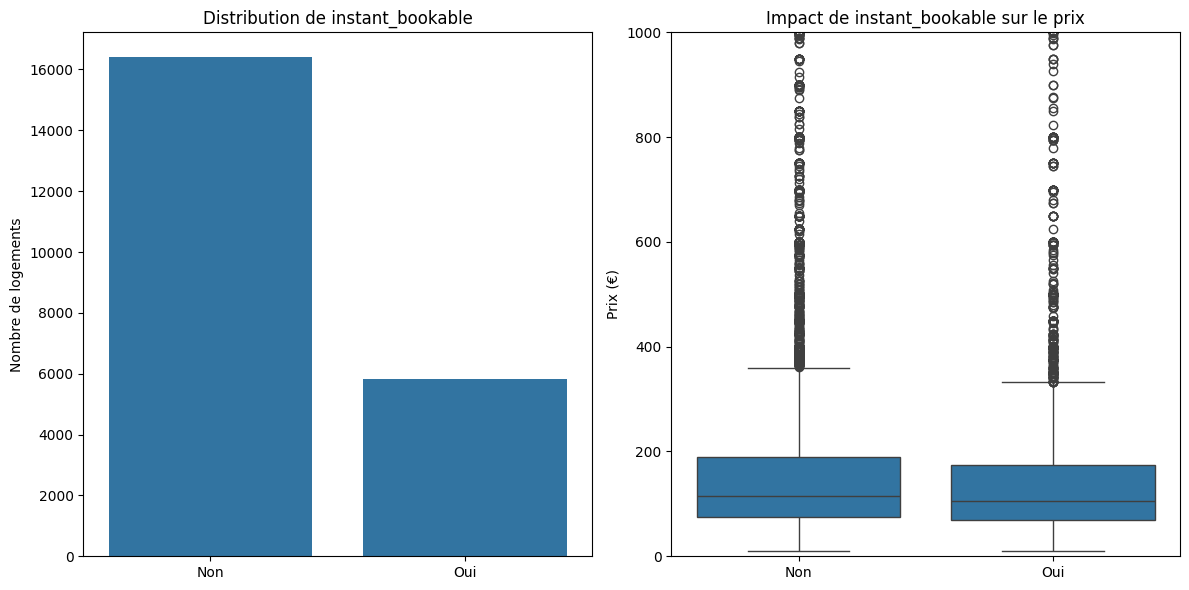


--- Prix moyen selon instant_bookable ---
instant_bookable = False: 163.36€
instant_bookable = True: 154.26€


<ipython-input-353-d34bfc3a397f>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Non', 'Oui'])


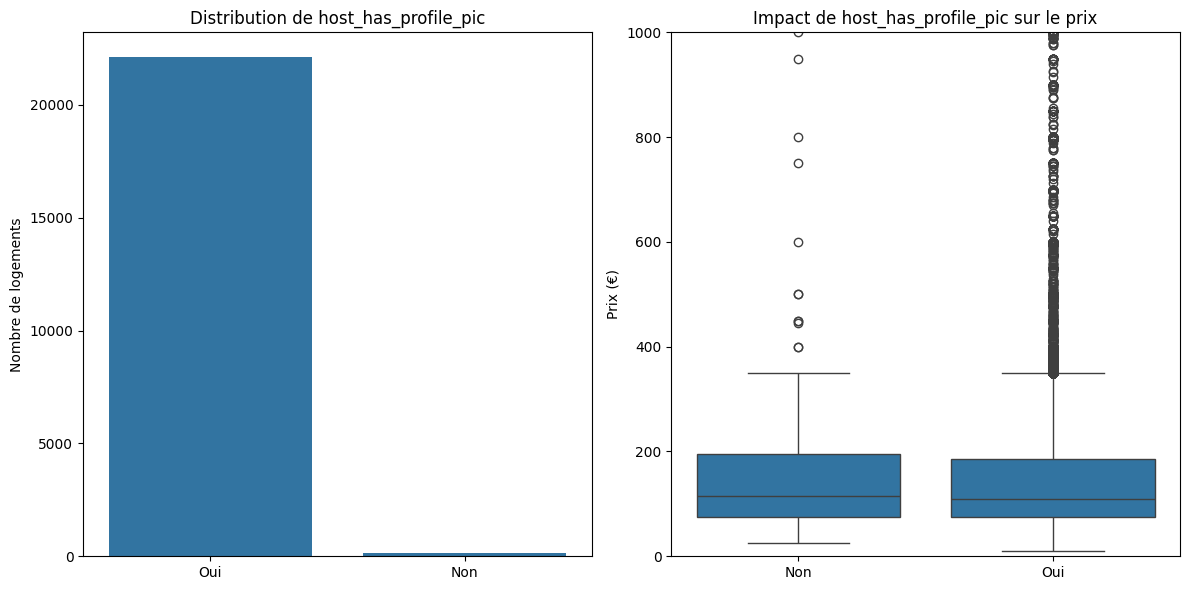


--- Prix moyen selon host_has_profile_pic ---
host_has_profile_pic = False: 184.71€
host_has_profile_pic = True: 160.84€


<ipython-input-353-d34bfc3a397f>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Non', 'Oui'])


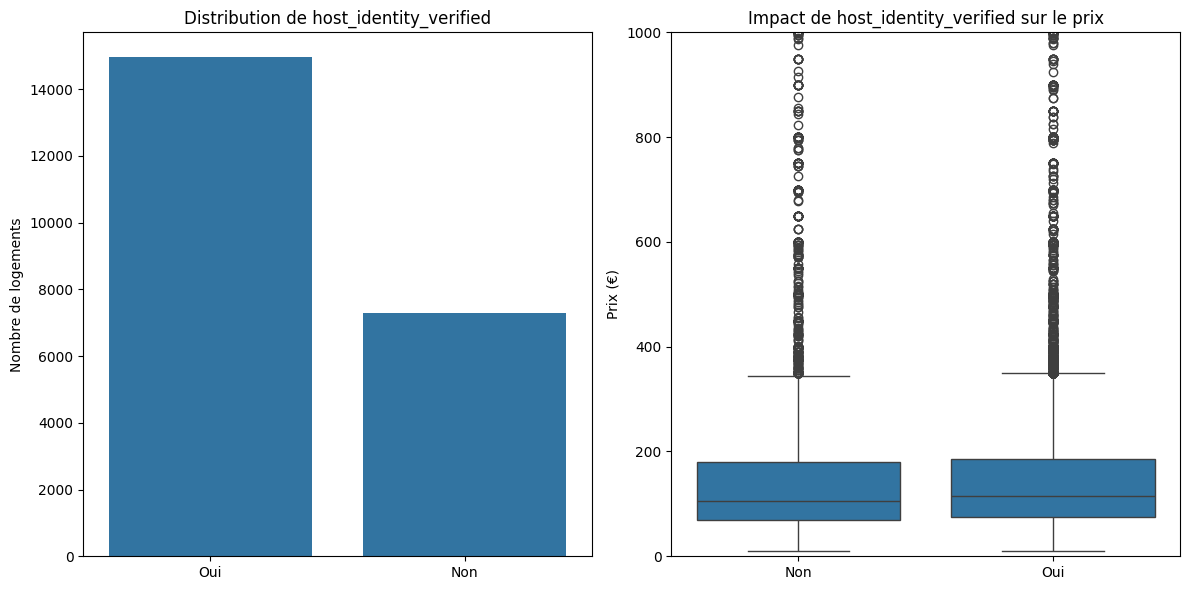


--- Prix moyen selon host_identity_verified ---
host_identity_verified = False: 162.60€
host_identity_verified = True: 160.18€


In [ ]:
def analyser_variables_booleennes(df):
    bool_vars = ['cleaning_fee', 'instant_bookable', 'host_has_profile_pic', 'host_identity_verified']

    for var in bool_vars:
        if var in df.columns:

            plt.figure(figsize=(12, 6))

            # Distribution
            counts = df[var].value_counts()
            ax1 = plt.subplot(1, 2, 1)
            sns.barplot(x=counts.index.map({True: 'Oui', False: 'Non'}), y=counts.values, ax=ax1)
            ax1.set_title(f'Distribution de {var}')
            ax1.set_xlabel('')
            ax1.set_ylabel('Nombre de logements')

            # Impact sur le prix
            ax2 = plt.subplot(1, 2, 2)
            sns.boxplot(x=var, y='price', data=df, ax=ax2)
            ax2.set_title(f'Impact de {var} sur le prix')
            ax2.set_xlabel('')
            ax2.set_ylabel('Prix (€)')
            ax2.set_ylim(0, 1000)  # Limiter pour une meilleure visualisation
            ax2.set_xticklabels(['Non', 'Oui'])

            plt.tight_layout()
            plt.show()

            # Prix moyen
            avg_prices = df.groupby(var)['price'].mean()
            print(f"\n--- Prix moyen selon {var} ---")
            for val, price in avg_prices.items():
                print(f"{var} = {val}: {price:.2f}€")

analyser_variables_booleennes(df_train)


# Traitement des données

**Transformation des types**

In [ ]:
class CorrigerType:
    def __init__(self):
        self.date_cols = ['first_review', 'last_review', 'host_since']
        self.bool_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
        self.percentage_cols = ['host_response_rate']
        self.list_cols = ['amenities']

    def transform(self, df):
        df = df.copy()
        target = df['log_price'] if 'log_price' in df.columns else None
        if target is not None:
            df = df.drop(columns=['log_price'])

        for col in self.date_cols:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')
        for col in self.bool_cols:
            if col in df.columns:
                df[col] = df[col].astype(str).str.strip().str.lower().map({'t': True, 'true': True, 'f': False, 'false': False})
        for col in self.percentage_cols:
            if col in df.columns:
                df[col] = df[col].astype(str).str.replace('%', '', regex=False).str.strip().replace('', None).astype(float)
        for col in self.list_cols:
            if col in df.columns:
                df[col] = df[col].apply(lambda x: [item.strip().strip('"') for item in x.strip('{}').split(',')] if isinstance(x, str) else x)

        if target is not None:
            df['log_price'] = target
        return df

**Gestion des valeurs nulles**

In [ ]:
class GestionValeursManquantes:
    def transform(self, df):
        df = df.copy()
        target = df['log_price'] if 'log_price' in df.columns else None
        if target is not None:
            df = df.drop(columns=['log_price'])

        if 'host_response_rate' in df:
            df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)
        if 'review_scores_rating' in df:
            df['review_scores_rating'].fillna(df['review_scores_rating'].median(), inplace=True)
        for col in ['first_review', 'last_review']:
            if col in df:
                df[col].fillna(df[col].mode()[0], inplace=True)
        if 'neighbourhood' in df:
            df['neighbourhood'].fillna('Unknown', inplace=True)
        if 'bathrooms' in df and 'bedrooms' in df:
            df['bathrooms'] = df.groupby('bedrooms')['bathrooms'].transform(lambda x: x.fillna(x.median()))
        if 'beds' in df:
            df['beds'] = df.apply(lambda row: row['beds'] if pd.notnull(row['beds']) else (min(row['accommodates'], row['accommodates'] * 0.8 + 1) if pd.notnull(row['accommodates']) else (row['bedrooms'] * 1.5 if pd.notnull(row['bedrooms']) else 1)), axis=1)
        if 'bedrooms' in df and 'accommodates' in df:
            missing_bedrooms = df['bedrooms'].isna()
            if missing_bedrooms.any():
                knn = KNeighborsRegressor(n_neighbors=3)
                knn.fit(df.loc[~missing_bedrooms, ['accommodates']], df.loc[~missing_bedrooms, 'bedrooms'])
                df.loc[missing_bedrooms, 'bedrooms'] = np.round(knn.predict(df.loc[missing_bedrooms, ['accommodates']]))
        for col in ['instant_bookable', 'host_has_profile_pic', 'host_identity_verified', 'cleaning_fee']:
            if col in df:
                df[col].fillna('f', inplace=True)
        if 'zipcode' in df and 'city' in df:
            df['zipcode'] = df.groupby('city')['zipcode'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
        if 'host_since' in df:
            df['host_since'].fillna(df['host_since'].dropna().median(), inplace=True)

        if target is not None:
            df['log_price'] = target
        return df

**Encodage des variables categorielles**

In [ ]:
class EncodeurColonnes:
    def __init__(self, colonnes=None):
        self.colonnes = colonnes
        self.encoders = {}

    def fit(self, df):
        colonnes = self.colonnes or df.select_dtypes(include=['object', 'category', 'bool']).columns
        colonnes = [col for col in colonnes if col != 'log_price']
        for col in colonnes:
            self.encoders[col] = {cat: i for i, cat in enumerate(df[col].astype(str).unique())}

    def transform(self, df):
        df = df.copy()
        target = df['log_price'] if 'log_price' in df.columns else None
        if target is not None:
            df = df.drop(columns=['log_price'])

        for col, mapping in self.encoders.items():
            if col in df.columns:
                df[col] = df[col].astype(str).map(mapping)

        if target is not None:
            df['log_price'] = target
        return df

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)


In [ ]:
class TargetEncoder:
    def __init__(self, colonnes=None, cible='log_price'):
        self.colonnes = colonnes
        self.cible = cible
        self.mappings = {}

    def fit(self, df):
        colonnes = self.colonnes or df.select_dtypes(include=['object', 'category', 'bool']).columns
        for col in colonnes:
            mean_map = df.groupby(col)[self.cible].mean()
            self.mappings[col] = mean_map.to_dict()

    def transform(self, df):
        df = df.copy()
        for col, mapping in self.mappings.items():
            if col in df.columns:
                df[col] = df[col].map(mapping).fillna(df[col].map(mapping).mean())
        return df

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

**Gestion Amenities**

In [ ]:
class GestionAmenities:
    def __init__(self, top_n=20):
        self.top_n = top_n
        self.frequent_amenities = []

    def fit(self, df):
        all_amenities = []
        for row in df['amenities'].dropna():
            all_amenities.extend(row)
        self.frequent_amenities = [amenity for amenity, _ in Counter(all_amenities).most_common(self.top_n)]

    def transform(self, df):
        df = df.copy()
        target = df['log_price'] if 'log_price' in df.columns else None
        if target is not None:
            df = df.drop(columns=['log_price'])

        for amenity in self.frequent_amenities:
            col_name = f"amenity_{amenity.strip().replace(' ', '_').lower()}"
            df[col_name] = df['amenities'].apply(lambda x: amenity in x if isinstance(x, list) else False)
        df['amenities_count'] = df['amenities'].apply(lambda x: len(x) if isinstance(x, list) else 0)

        if target is not None:
            df['log_price'] = target
        return df

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)


**Création de features**

In [ ]:
class FeaturesDerivees:
    def __init__(self):
        self.keyword_groups = {
            'luxury_mentioned': ['luxury', 'luxurious', 'premium', 'elegant', 'high-end', 'upscale'],
            'central_location': ['central', 'downtown', 'center', 'heart of'],
            'has_view': ['view', 'panoramic', 'overlooking', 'balcony']
        }

    def contains_keywords(self, text, keywords):
        if pd.isna(text):
            return 0
        text = text.lower()
        return int(any(keyword in text for keyword in keywords))

    def transform(self, df):
        df = df.copy()
        target = df['log_price'] if 'log_price' in df.columns else None
        if target is not None:
            df = df.drop(columns=['log_price'])

        if {'number_of_reviews', 'review_scores_rating'}.issubset(df.columns):
            df['review_density'] = df['number_of_reviews'] / (df['review_scores_rating'] + 1e-6)
        if {'bathrooms', 'accommodates'}.issubset(df.columns):
            df['bathroom_per_person'] = df['bathrooms'] / (df['accommodates'] + 1e-6)
        if {'bedrooms', 'beds'}.issubset(df.columns):
            df['bedroom_per_bed'] = df['bedrooms'] / (df['beds'] + 1e-6)
        if 'first_review' in df:
            df['days_since_first_review'] = (pd.Timestamp('today') - pd.to_datetime(df['first_review'], errors='coerce')).dt.days
        if 'host_since' in df:
            df['host_age_days'] = (pd.Timestamp('today') - pd.to_datetime(df['host_since'], errors='coerce')).dt.days
        for col in ['description', 'name']:
            if col in df.columns:
                df[f'{col}_length'] = df[col].astype(str).apply(len)
                df[f'{col}_word_count'] = df[col].astype(str).apply(lambda x: len(re.findall(r'\w+', x)))
                for feat_name, keywords in self.keyword_groups.items():
                    df[feat_name] = df.get(feat_name, 0) | df[col].astype(str).apply(lambda x: self.contains_keywords(x, keywords))

        if target is not None:
            df['log_price'] = target
        return df

**Gestion des outliers**

In [ ]:
class GestionOutliers:
    def __init__(self, method='iqr', factor=1.5):
        self.method = method
        self.factor = factor
        self.bounds = {}

    def fit(self, df):
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        numeric_cols = [col for col in numeric_cols if col != 'log_price']
        for col in numeric_cols:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            self.bounds[col] = (q1 - self.factor * iqr, q3 + self.factor * iqr)

    def transform(self, df):
        df = df.copy()
        target = df['log_price'] if 'log_price' in df.columns else None
        if target is not None:
            df = df.drop(columns=['log_price'])

        for col, (low, high) in self.bounds.items():
            if col in df.columns:
                df[col] = df[col].clip(lower=low, upper=high)

        if target is not None:
            df['log_price'] = target
        return df

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

**Création de cluster géographique**

In [ ]:
class ClusterGeo:
    def __init__(self, n_clusters=10):
        self.n_clusters = n_clusters
        self.kmeans = None

    def fit(self, df):
        coords = df[['latitude', 'longitude']].dropna()
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        self.kmeans.fit(coords)

    def transform(self, df):
        df = df.copy()
        target = df['log_price'] if 'log_price' in df.columns else None
        if target is not None:
            df = df.drop(columns=['log_price'])

        if self.kmeans:
            mask = df[['latitude', 'longitude']].notnull().all(axis=1)
            df['geo_cluster'] = -1
            df.loc[mask, 'geo_cluster'] = self.kmeans.predict(df.loc[mask, ['latitude', 'longitude']])

        df.drop(columns=['latitude', 'longitude', 'zipcode', 'city'], inplace=True, errors='ignore')

        if target is not None:
            df['log_price'] = target
        return df

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

**Standardisation des données numériques**

In [ ]:
class StandardiseurNumerique:
    def __init__(self):
        self.scaler = StandardScaler()
        self.numeric_cols = []

    def fit(self, df):
        self.numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        self.scaler.fit(df[self.numeric_cols])

    def transform(self, df):
        df = df.copy()
        df[self.numeric_cols] = self.scaler.transform(df[self.numeric_cols])
        return df

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

**Elimination des colonnes avec une trop faible correlation**

In [ ]:
class FiltreCorrelation:
    def __init__(self, target='log_price', seuil=0.01):
        self.target = target
        self.seuil = seuil
        self.colonnes_a_conserver = []

    def fit(self, df):
        if self.target not in df.columns:
            raise ValueError(f"La colonne cible '{self.target}' est absente.")

        correlations = df.corr()[self.target].drop(labels=[self.target])
        self.colonnes_a_conserver = correlations[correlations.abs() >= self.seuil].index.tolist()

    def transform(self, df):
        colonnes = self.colonnes_a_conserver + [self.target] if self.target in df.columns else self.colonnes_a_conserver
        return df[[col for col in colonnes if col in df.columns]].copy()

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

**Réduction de dimension : PCA**

In [ ]:
class ReductionDimension:
    def __init__(self, n_components=10):
        self.n_components = n_components
        self.pca = PCA(n_components=n_components)
        self.columns_ = []

    def fit(self, df):
        self.columns_ = df.select_dtypes(include=[np.number]).columns.tolist()
        df_imputed = df[self.columns_].fillna(df[self.columns_].mean())
        self.pca.fit(df_imputed)

    def transform(self, df):
        df = df.copy()
        df_imputed = df[self.columns_].fillna(df[self.columns_].mean())
        reduced = self.pca.transform(df_imputed)
        for i in range(self.n_components):
            df[f'pca_{i+1}'] = reduced[:, i]
        df.drop(columns=self.columns_, inplace=True, errors='ignore')
        return df

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)


# Entrainement et prédiction

In [ ]:
def comparer_et_predire(df_train, df_test=None, seuil_correlation=0.01,
                     n_clusters=20, split_ratio=0.2, random_state=42, retourner_predictions=True,
                     verbose_traitement=True):

    # Vérifications des entrées
    df_train = df_train.copy()
    if 'log_price' not in df_train.columns:
        raise ValueError("Le DataFrame d'entraînement ne contient pas la colonne 'log_price'.")

    # Préparation des données
    y_train_full = df_train['log_price']
    X_train_full = df_train.drop(columns=['log_price'])

    # Division des données d'entraînement en ensembles d'entraînement et de validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=split_ratio, random_state=random_state
    )

    # Préparation du DataFrame de test si fourni
    test_ids = None
    X_test_processed = None
    if df_test is not None:
        df_test = df_test.copy()
        # Créer une colonne id si elle n'existe pas
        if 'id' not in df_test.columns:
            #if verbose_traitement:
               # print("Attention: Colonne 'id' non trouvée dans le DataFrame de test. Création d'ids séquentiels.")
            df_test['id'] = range(len(df_test))
        test_ids = df_test['id'].copy()

    # Réintégrer temporairement log_price pour le pipeline
    X_train_temp = X_train.copy()
    X_train_temp['log_price'] = y_train
    X_val_temp = X_val.copy()
    X_val_temp['log_price'] = y_val

    # Préparation des données complètes pour l'entraînement final
    X_train_full_temp = X_train_full.copy()
    X_train_full_temp['log_price'] = y_train_full

    # Préparer les DataFrames pour le pipeline
    if df_test is not None:
        X_test_temp = df_test.copy()
        # S'assurer que le test a les mêmes colonnes que train (sauf log_price et id)
        for col in X_train_full.columns:
            if col not in X_test_temp.columns and col != 'id':
                X_test_temp[col] = np.nan

    # Application du pipeline de prétraitement
    pipeline = [
        CorrigerType(),
        GestionValeursManquantes(),
        GestionAmenities(),
        ClusterGeo(n_clusters=n_clusters),
        FeaturesDerivees(),
        GestionOutliers()
    ]

    # Appliquer le pipeline sur les ensembles de validation
    for step in pipeline:
        if hasattr(step, 'fit_transform'):
            X_train_temp = step.fit_transform(X_train_temp)
        else:
            X_train_temp = step.transform(X_train_temp)
        X_val_temp = step.transform(X_val_temp)

    # Extraire la cible à nouveau
    y_train = X_train_temp.pop('log_price')
    y_val = X_val_temp.pop('log_price')

    # Appliquer le pipeline sur l'ensemble d'entraînement complet et test
    if df_test is not None:
        # Réinitialiser le pipeline pour l'appliquer sur l'ensemble complet
        for step in pipeline:
            if hasattr(step, 'fit_transform'):
                X_train_full_temp = step.fit_transform(X_train_full_temp)
            else:
                X_train_full_temp = step.transform(X_train_full_temp)
            X_test_temp = step.transform(X_test_temp)

        # Extraire la cible de l'ensemble complet
        y_train_full = X_train_full_temp.pop('log_price')

    # Convertir les dates en nombres (jours depuis aujourd'hui)
    date_cols = ['first_review', 'last_review', 'host_since']

    # Pour les ensembles de validation
    for col in date_cols:
        if col in X_train_temp.columns:
            X_train_temp[col] = (pd.Timestamp('today') - pd.to_datetime(X_train_temp[col], errors='coerce')).dt.days
        if col in X_val_temp.columns:
            X_val_temp[col] = (pd.Timestamp('today') - pd.to_datetime(X_val_temp[col], errors='coerce')).dt.days

    # Pour l'ensemble complet et test
    if df_test is not None:
        for col in date_cols:
            if col in X_train_full_temp.columns:
                X_train_full_temp[col] = (pd.Timestamp('today') - pd.to_datetime(X_train_full_temp[col], errors='coerce')).dt.days
            if col in X_test_temp.columns:
                X_test_temp[col] = (pd.Timestamp('today') - pd.to_datetime(X_test_temp[col], errors='coerce')).dt.days

    # Encodage des variables catégorielles
    # Pour les ensembles de validation
    encoder_val = EncodeurColonnes()
    X_train_encoded = encoder_val.fit_transform(X_train_temp)
    X_val_encoded = encoder_val.transform(X_val_temp)

    # Pour l'ensemble complet et test
    if df_test is not None:
        encoder_full = EncodeurColonnes()
        X_train_full_encoded = encoder_full.fit_transform(X_train_full_temp)
        X_test_encoded = encoder_full.transform(X_test_temp)

    # Standardisation des variables numériques
    # Pour les ensembles de validation
    scaler_val = StandardiseurNumerique()
    X_train_scaled = scaler_val.fit_transform(X_train_encoded)
    X_val_scaled = scaler_val.transform(X_val_encoded)

    # Pour l'ensemble complet et test
    if df_test is not None:
        scaler_full = StandardiseurNumerique()
        X_train_full_scaled = scaler_full.fit_transform(X_train_full_encoded)
        X_test_scaled = scaler_full.transform(X_test_encoded)

    # Filtre de corrélation
    # Pour les ensembles de validation
    temp_train_val = X_train_scaled.copy()
    temp_train_val['log_price'] = y_train

    filtre_val = FiltreCorrelation(seuil=seuil_correlation)
    filtre_val.fit(temp_train_val)

    X_train_filtered = filtre_val.transform(X_train_scaled)
    X_val_filtered = filtre_val.transform(X_val_scaled)

    # Pour l'ensemble complet et test
    if df_test is not None:
        temp_train_full = X_train_full_scaled.copy()
        temp_train_full['log_price'] = y_train_full

        filtre_full = FiltreCorrelation(seuil=seuil_correlation)
        filtre_full.fit(temp_train_full)

        X_train_full_filtered = filtre_full.transform(X_train_full_scaled)
        X_test_filtered = filtre_full.transform(X_test_scaled)

    # Nettoyage final des NaN
    X_train_filtered = X_train_filtered.fillna(0)
    X_val_filtered = X_val_filtered.fillna(0)

    if df_test is not None:
        X_train_full_filtered = X_train_full_filtered.fillna(0)
        X_test_filtered = X_test_filtered.fillna(0)

    # Définition des modèles
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Random Forest": RandomForestRegressor(random_state=random_state),
        "Gradient Boosting": GradientBoostingRegressor(random_state=random_state),
        "Support Vector Machine": SVR(),
        "XGBoost": XGBRegressor(random_state=random_state, max_depth=6)
    }



    # Comparaison des modèles sur les données de validation
    results = {}
    best_model_name = None
    best_r2 = -float('inf')

    print("=== Comparaison des modèles sur les données de validation ===")

    for name, model in models.items():
        model.fit(X_train_filtered, y_train)
        preds_val = model.predict(X_val_filtered)
        r2_val = r2_score(y_val, preds_val)
        rmse_val = np.sqrt(mean_squared_error(y_val, preds_val))

        # Calcul du R2 sur l'ensemble d'entraînement
        preds_train = model.predict(X_train_filtered)
        r2_train = r2_score(y_train, preds_train)

        print(f"{name} => R2 train: {r2_train:.4f} | R2 validation: {r2_val:.4f} | RMSE validation: {rmse_val:.4f}")

        results[name] = {
            'r2_train': r2_train,
            'r2_validation': r2_val,
            'rmse_validation': rmse_val
        }

        # Mettre à jour le meilleur modèle
        if r2_val > best_r2:
            best_r2 = r2_val
            best_model_name = name

    print(f"\nMeilleur modèle sur validation: {best_model_name} (R2: {best_r2:.4f})")

    # Prédictions sur le test si fourni
    if df_test is not None:
        print(f"\n=== Prédictions sur le jeu de test avec le modèle {best_model_name} ===")

        final_model = models[best_model_name]
        final_model.fit(X_train_full_filtered, y_train_full)

        # Évaluer le modèle final sur l'ensemble d'entraînement complet
        preds_train_full = final_model.predict(X_train_full_filtered)
        r2_train_full = r2_score(y_train_full, preds_train_full)
        rmse_train_full = np.sqrt(mean_squared_error(y_train_full, preds_train_full))

        print(f"Score R2 sur l'ensemble d'entraînement complet: {r2_train_full:.4f}")
        print(f"RMSE sur l'ensemble d'entraînement complet: {rmse_train_full:.4f}")


    return results

In [ ]:
df_train = pd.read_csv("airbnb_train.csv")
df_test = pd.read_csv("airbnb_test.csv")
resultats = comparer_et_predire(df_train, df_test, verbose_traitement=True)

<ipython-input-317-69330bdcebce>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)
<ipython-input-317-69330bdcebce>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

=== Comparaison des modèles sur les données de validation ===
Linear Regression => R2 train: 0.5610 | R2 validation: 0.5548 | RMSE validation: 0.4776
Ridge Regression => R2 train: 0.5610 | R2 validation: 0.5547 | RMSE validation: 0.4776
Random Forest => R2 train: 0.9488 | R2 validation: 0.6315 | RMSE validation: 0.4345
Gradient Boosting => R2 train: 0.6573 | R2 validation: 0.6369 | RMSE validation: 0.4313
Support Vector Machine => R2 train: 0.7643 | R2 validation: 0.5965 | RMSE validation: 0.4547
XGBoost => R2 train: 0.8521 | R2 validation: 0.6413 | RMSE validation: 0.4287

Meilleur modèle sur validation: XGBoost (R2: 0.6413)

=== Prédictions sur le jeu de test avec le modèle XGBoost ===
Score R2 sur l'ensemble d'entraînement complet: 0.8424
RMSE sur l'ensemble d'entraînement complet: 0.2853


**Nous avons remarqué qu'il était probable qu'il y ait une fuite des données lors du processus d'entrainement. Nous avons donc réalisé une seconde version**

In [ ]:
def comparer_et_predire_2(df_train, df_test=None, seuil_correlation=0.01,
                     n_clusters=20, split_ratio=0.2, random_state=42, retourner_predictions=True,
                     verbose_traitement=True, fichier_prediction_exemple=None, fichier_sortie="MaPredictionFinale.csv"):

    # Vérifications des entrées
    df_train = df_train.copy()
    if 'log_price' not in df_train.columns:
        raise ValueError("Le DataFrame d'entraînement ne contient pas la colonne 'log_price'.")

    # Préparation des données
    y_train_full = df_train['log_price']
    X_train_full = df_train.drop(columns=['log_price'])

    # Division des données d'entraînement en ensembles d'entraînement et de validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=split_ratio, random_state=random_state
    )

    # Préparation du DataFrame de test si fourni
    test_ids = None
    X_test = None
    if df_test is not None:
        df_test_copy = df_test.copy()

        # Debug: voir les colonnes disponibles
        if verbose_traitement:
            print(f"Colonnes disponibles dans df_test: {list(df_test_copy.columns)}")

        # Gérer les IDs
        if 'id' in df_test_copy.columns:
            # Si la colonne id existe, l'extraire
            test_ids = df_test_copy['id'].values
            # Créer X_test sans la colonne id
            X_test = df_test_copy.drop(columns=['id'])
            if verbose_traitement:
                print(f"Colonne 'id' trouvée. {len(test_ids)} IDs extraits.")
        else:
            # Si pas de colonne id, créer des IDs séquentiels
            test_ids = np.arange(len(df_test_copy))
            X_test = df_test_copy.copy()
            if verbose_traitement:
                print(f"Colonne 'id' non trouvée. Création de {len(test_ids)} IDs séquentiels.")

        if verbose_traitement:
            print(f"Forme de X_test: {X_test.shape}")
            print(f"Colonnes de X_test: {list(X_test.columns)}")

        # S'assurer que X_test a les mêmes colonnes que X_train_full (sauf log_price)
        colonnes_manquantes = set(X_train_full.columns) - set(X_test.columns)
        if colonnes_manquantes:
            if verbose_traitement:
                print(f"Ajout des colonnes manquantes dans X_test: {colonnes_manquantes}")
            for col in colonnes_manquantes:
                X_test[col] = np.nan


    # 1: FITTER TOUS LES TRANSFORMATEURS SUR L'ENSEMBLE COMPLET

    print("=== Fitting des transformateurs sur l'ensemble d'entraînement complet ===")

    # Préparer l'ensemble complet avec la cible pour le fitting
    X_train_full_temp = X_train_full.copy()
    X_train_full_temp['log_price'] = y_train_full

    # 1. Pipeline de prétraitement - FIT sur ensemble complet
    pipeline = [
        CorrigerType(),
        GestionValeursManquantes(),
        GestionAmenities(),
        ClusterGeo(n_clusters=n_clusters),
        FeaturesDerivees(),
        GestionOutliers()
    ]

    # Appliquer et fitter le pipeline sur l'ensemble complet
    X_train_full_processed = X_train_full_temp.copy()
    for step in pipeline:
        if hasattr(step, 'fit_transform'):
            X_train_full_processed = step.fit_transform(X_train_full_processed)
        elif hasattr(step, 'fit'):
            step.fit(X_train_full_processed)
            X_train_full_processed = step.transform(X_train_full_processed)
        else:
            X_train_full_processed = step.transform(X_train_full_processed)

    # Extraire la cible
    y_train_full_processed = X_train_full_processed.pop('log_price')

    # 2. Conversion des dates - basée sur l'ensemble complet
    date_cols = ['first_review', 'last_review', 'host_since']
    for col in date_cols:
        if col in X_train_full_processed.columns:
            X_train_full_processed[col] = (pd.Timestamp('today') - pd.to_datetime(X_train_full_processed[col], errors='coerce')).dt.days

    # 3. Encodage - FIT sur ensemble complet
    encoder = EncodeurColonnes()
    X_train_full_encoded = encoder.fit_transform(X_train_full_processed)

    # 4. Standardisation - FIT sur ensemble complet
    scaler = StandardiseurNumerique()
    X_train_full_scaled = scaler.fit_transform(X_train_full_encoded)

    # 5. Filtre de corrélation - FIT sur ensemble complet
    temp_train_full = X_train_full_scaled.copy()
    temp_train_full['log_price'] = y_train_full_processed

    filtre = FiltreCorrelation(seuil=seuil_correlation)
    filtre.fit(temp_train_full)

    X_train_full_filtered = filtre.transform(X_train_full_scaled)
    X_train_full_filtered = X_train_full_filtered.fillna(0)

    # 2: APPLIQUER LES TRANSFORMATEURS FITTÉS AUX SOUS-ENSEMBLES

    def appliquer_transformations_fittees(X_input, y_input=None, inclure_cible=False):
        """Applique tous les transformateurs déjà fittés à un ensemble de données"""

        if inclure_cible and y_input is not None:
            X_temp = X_input.copy()
            X_temp['log_price'] = y_input
        else:
            X_temp = X_input.copy()

        # Appliquer le pipeline (transform seulement)
        for step in pipeline:
            X_temp = step.transform(X_temp)

        # Extraire la cible si elle était incluse
        if inclure_cible and 'log_price' in X_temp.columns:
            y_output = X_temp.pop('log_price')
        else:
            y_output = None

        # Conversion des dates
        for col in date_cols:
            if col in X_temp.columns:
                X_temp[col] = (pd.Timestamp('today') - pd.to_datetime(X_temp[col], errors='coerce')).dt.days

        # Encodage (transform seulement)
        X_encoded = encoder.transform(X_temp)

        # Standardisation (transform seulement)
        X_scaled = scaler.transform(X_encoded)

        # Filtre de corrélation (transform seulement)
        X_filtered = filtre.transform(X_scaled)
        X_filtered = X_filtered.fillna(0)

        if inclure_cible:
            return X_filtered, y_output
        else:
            return X_filtered

    # Appliquer aux ensembles train/validation
    X_train_filtered, y_train_processed = appliquer_transformations_fittees(X_train, y_train, inclure_cible=True)
    X_val_filtered, y_val_processed = appliquer_transformations_fittees(X_val, y_val, inclure_cible=True)

    # Appliquer au test si fourni
    X_test_filtered = None
    if df_test is not None:
        X_test_filtered = appliquer_transformations_fittees(X_test)

    # 3: COMPARAISON DES MODÈLES

    # Définition des modèles
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Random Forest": RandomForestRegressor(random_state=random_state),
        "Gradient Boosting": GradientBoostingRegressor(random_state=random_state),
        "Support Vector Machine": SVR(),
        "XGBoost": XGBRegressor(random_state=random_state)
    }



    # Comparaison des modèles sur les données de validation
    results = {}
    best_model_name = None
    best_r2 = -float('inf')

    print("\n=== Comparaison des modèles sur les données de validation ===")

    for name, model in models.items():
        # Entraîner sur l'ensemble d'entraînement (subset)
        model.fit(X_train_filtered, y_train_processed)

        # Prédictions sur validation
        preds_val = model.predict(X_val_filtered)
        r2_val = r2_score(y_val_processed, preds_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_processed, preds_val))

        # Calcul du R2 sur l'ensemble d'entraînement (subset)
        preds_train = model.predict(X_train_filtered)
        r2_train = r2_score(y_train_processed, preds_train)

        print(f"{name} => R2 train: {r2_train:.4f} | R2 validation: {r2_val:.4f} | RMSE validation: {rmse_val:.4f}")

        results[name] = {
            'r2_train': r2_train,
            'r2_validation': r2_val,
            'rmse_validation': rmse_val
        }

        # Mettre à jour le meilleur modèle
        if r2_val > best_r2:
            best_r2 = r2_val
            best_model_name = name

    print(f"\nMeilleur modèle sur validation: {best_model_name} (R2: {best_r2:.4f})")

    # 4: MODÈLE FINAL ET PRÉDICTIONS

    if df_test is not None:
        print(f"\n=== Prédictions sur le jeu de test avec le modèle {best_model_name} ===")

        # Entraîner le modèle final sur l'ensemble complet
        final_model = models[best_model_name]
        final_model.fit(X_train_full_filtered, y_train_full_processed)

        # Évaluer le modèle final sur l'ensemble d'entraînement complet
        preds_train_full = final_model.predict(X_train_full_filtered)
        r2_train_full = r2_score(y_train_full_processed, preds_train_full)
        rmse_train_full = np.sqrt(mean_squared_error(y_train_full_processed, preds_train_full))

        print(f"Score R2 sur l'ensemble d'entraînement complet: {r2_train_full:.4f}")
        print(f"RMSE sur l'ensemble d'entraînement complet: {rmse_train_full:.4f}")



    return results

In [ ]:
df_train = pd.read_csv("airbnb_train.csv")
df_test = pd.read_csv("airbnb_test.csv")
resultats = comparer_et_predire_2(df_train, df_test, verbose_traitement=True)

Colonnes disponibles dans df_test: ['Unnamed: 0', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms', 'beds']
Colonne 'id' non trouvée. Création de 51877 IDs séquentiels.
Forme de X_test: (51877, 27)
Colonnes de X_test: ['Unnamed: 0', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms', 'beds']
Ajout d

<ipython-input-355-69330bdcebce>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)
<ipython-input-355-69330bdcebce>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met


=== Comparaison des modèles sur les données de validation ===
Linear Regression => R2 train: 0.4490 | R2 validation: 0.4321 | RMSE validation: 0.5394
Ridge Regression => R2 train: 0.4489 | R2 validation: 0.4319 | RMSE validation: 0.5395
Random Forest => R2 train: 0.9495 | R2 validation: 0.6290 | RMSE validation: 0.4360
Gradient Boosting => R2 train: 0.6585 | R2 validation: 0.6369 | RMSE validation: 0.4313
Support Vector Machine => R2 train: 0.7396 | R2 validation: 0.5448 | RMSE validation: 0.4829
XGBoost => R2 train: 0.8599 | R2 validation: 0.6515 | RMSE validation: 0.4225

Meilleur modèle sur validation: XGBoost (R2: 0.6515)

=== Prédictions sur le jeu de test avec le modèle XGBoost ===
Score R2 sur l'ensemble d'entraînement complet: 0.8424
RMSE sur l'ensemble d'entraînement complet: 0.2853


**Ajout de la PCA**

In [378]:
def comparer_et_predire_3(df_train, df_test=None, seuil_correlation=0.005,
                     n_clusters=20, split_ratio=0.2, random_state=42, retourner_predictions=True,
                     verbose_traitement=True, n_components_pca=None,  # <-- nouveau paramètre PCA
                     fichier_prediction_exemple=None, fichier_sortie="MaPredictionFinale.csv"):

    # Vérifications
    df_train = df_train.copy()
    if 'log_price' not in df_train.columns:
        raise ValueError("Le DataFrame d'entraînement ne contient pas la colonne 'log_price'.")

    y_train_full = df_train['log_price']
    X_train_full = df_train.drop(columns=['log_price'])

    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=split_ratio, random_state=random_state
    )

    test_ids = None
    X_test = None
    if df_test is not None:
        df_test_copy = df_test.copy()
        if 'id' in df_test_copy.columns:
            test_ids = df_test_copy['id'].values
            X_test = df_test_copy.drop(columns=['id'])
        else:
            test_ids = np.arange(len(df_test_copy))
            X_test = df_test_copy.copy()

        # Ajout colonnes manquantes si besoin
        colonnes_manquantes = set(X_train_full.columns) - set(X_test.columns)
        for col in colonnes_manquantes:
            X_test[col] = np.nan

    # Pipeline de transformation (à adapter si nécessaire)
    pipeline = [
        CorrigerType(),
        GestionValeursManquantes(),
        GestionAmenities(),
        ClusterGeo(n_clusters=n_clusters),
        FeaturesDerivees(),
        GestionOutliers()
    ]

    # 1. Fit pipeline sur ensemble complet (train full + y)
    X_train_full_temp = X_train_full.copy()
    X_train_full_temp['log_price'] = y_train_full

    for step in pipeline:
        if hasattr(step, 'fit_transform'):
            X_train_full_temp = step.fit_transform(X_train_full_temp)
        elif hasattr(step, 'fit'):
            step.fit(X_train_full_temp)
            X_train_full_temp = step.transform(X_train_full_temp)
        else:
            X_train_full_temp = step.transform(X_train_full_temp)

    y_train_full_processed = X_train_full_temp.pop('log_price')

    date_cols = ['first_review', 'last_review', 'host_since']
    for col in date_cols:
        if col in X_train_full_temp.columns:
            X_train_full_temp[col] = (pd.Timestamp('today') - pd.to_datetime(X_train_full_temp[col], errors='coerce')).dt.days

    encoder = EncodeurColonnes()
    X_train_full_encoded = encoder.fit_transform(X_train_full_temp)

    scaler = StandardiseurNumerique()
    X_train_full_scaled = scaler.fit_transform(X_train_full_encoded)

    # --- PCA ---
    if n_components_pca is not None and n_components_pca > 0:
        reducer = ReductionDimension(n_components=n_components_pca)
        X_train_full_pca_df = reducer.fit_transform(pd.DataFrame(X_train_full_scaled))
    else:
        reducer = None
        X_train_full_pca_df = pd.DataFrame(X_train_full_scaled)

    # Filtre de corrélation
    temp_train_full = X_train_full_pca_df.copy()
    temp_train_full['log_price'] = y_train_full_processed
    filtre = FiltreCorrelation(seuil=seuil_correlation)
    filtre.fit(temp_train_full)
    X_train_full_filtered = filtre.transform(X_train_full_pca_df)
    X_train_full_filtered = X_train_full_filtered.fillna(0)

    def appliquer_transformations_fittees(X_input, y_input=None, inclure_cible=False):
        if inclure_cible and y_input is not None:
            X_temp = X_input.copy()
            X_temp['log_price'] = y_input
        else:
            X_temp = X_input.copy()

        for step in pipeline:
            X_temp = step.transform(X_temp)

        if inclure_cible and 'log_price' in X_temp.columns:
            y_output = X_temp.pop('log_price')
        else:
            y_output = None

        for col in date_cols:
            if col in X_temp.columns:
                X_temp[col] = (pd.Timestamp('today') - pd.to_datetime(X_temp[col], errors='coerce')).dt.days

        X_encoded = encoder.transform(X_temp)
        X_scaled = scaler.transform(X_encoded)

        if reducer is not None:
            X_pca_df = reducer.transform(pd.DataFrame(X_scaled))
        else:
            X_pca_df = pd.DataFrame(X_scaled)

        X_filtered = filtre.transform(X_pca_df)
        X_filtered = X_filtered.fillna(0)

        if inclure_cible:
            return X_filtered, y_output
        else:
            return X_filtered

    X_train_filtered, y_train_processed = appliquer_transformations_fittees(X_train, y_train, inclure_cible=True)
    X_val_filtered, y_val_processed = appliquer_transformations_fittees(X_val, y_val, inclure_cible=True)

    X_test_filtered = None
    if df_test is not None:
        X_test_filtered = appliquer_transformations_fittees(X_test)

    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Random Forest": RandomForestRegressor(random_state=random_state),
        "Gradient Boosting": GradientBoostingRegressor(random_state=random_state),
        "Support Vector Machine": SVR(),
        "XGBoost": XGBRegressor(random_state=random_state)
    }

    results = {}
    best_model_name = None
    best_r2 = -float('inf')

    print("\n=== Comparaison des modèles sur les données de validation ===")

    for name, model in models.items():
        model.fit(X_train_filtered, y_train_processed)
        preds_val = model.predict(X_val_filtered)
        r2_val = r2_score(y_val_processed, preds_val)
        rmse_val = np.sqrt(mean_squared_error(y_val_processed, preds_val))

        preds_train = model.predict(X_train_filtered)
        r2_train = r2_score(y_train_processed, preds_train)

        print(f"{name} => R2 train: {r2_train:.4f} | R2 validation: {r2_val:.4f} | RMSE validation: {rmse_val:.4f}")

        results[name] = {
            'r2_train': r2_train,
            'r2_validation': r2_val,
            'rmse_validation': rmse_val
        }

        if r2_val > best_r2:
            best_r2 = r2_val
            best_model_name = name

    print(f"\nMeilleur modèle sur validation: {best_model_name} (R2: {best_r2:.4f})")

    if df_test is not None:
        print(f"\n=== Prédictions sur le jeu de test avec le modèle {best_model_name} ===")

        final_model = models[best_model_name]
        final_model.fit(X_train_full_filtered, y_train_full_processed)

        preds_train_full = final_model.predict(X_train_full_filtered)
        r2_train_full = r2_score(y_train_full_processed, preds_train_full)
        rmse_train_full = np.sqrt(mean_squared_error(y_train_full_processed, preds_train_full))

        print(f"Score R2 sur l'ensemble d'entraînement complet: {r2_train_full:.4f}")
        print(f"RMSE sur l'ensemble d'entraînement complet: {rmse_train_full:.4f}")

        # Prédictions sur le test
        log_predictions = final_model.predict(X_test_filtered)


        # Création du DataFrame de résultats
        resultats_df = pd.DataFrame({
            'id': test_ids,
            'log_price': log_predictions,
        })

        print(f"Prédictions générées pour {len(resultats_df)} entrées")

        # Ajouter les informations sur le modèle final
        results[best_model_name] = {
            'nom': best_model_name,
            'r2_train_complet': r2_train_full,
            'rmse_train_complet': rmse_train_full
        }




    return results

In [379]:
df_train = pd.read_csv("airbnb_train.csv")
df_test = pd.read_csv("airbnb_test.csv")
resultats = comparer_et_predire_3(df_train, df_test, verbose_traitement=True)

<ipython-input-355-69330bdcebce>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)
<ipython-input-355-69330bdcebce>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met


=== Comparaison des modèles sur les données de validation ===
Linear Regression => R2 train: 0.4510 | R2 validation: 0.4350 | RMSE validation: 0.5380
Ridge Regression => R2 train: 0.4510 | R2 validation: 0.4349 | RMSE validation: 0.5381
Random Forest => R2 train: 0.9496 | R2 validation: 0.6318 | RMSE validation: 0.4343
Gradient Boosting => R2 train: 0.6586 | R2 validation: 0.6377 | RMSE validation: 0.4308
Support Vector Machine => R2 train: 0.7462 | R2 validation: 0.5505 | RMSE validation: 0.4799
XGBoost => R2 train: 0.8574 | R2 validation: 0.6502 | RMSE validation: 0.4233

Meilleur modèle sur validation: XGBoost (R2: 0.6502)

=== Prédictions sur le jeu de test avec le modèle XGBoost ===
Score R2 sur l'ensemble d'entraînement complet: 0.8432
RMSE sur l'ensemble d'entraînement complet: 0.2846
Prédictions générées pour 51877 entrées


# Sauvegarde de la prédiction

In [381]:
df_train = pd.read_csv("airbnb_train.csv")
df_test = pd.read_csv("airbnb_test.csv")

# Appliquer la fonction avec sauvegarde
resultats = comparer_et_predire_3(
    df_train=df_train,
    df_test=df_test,
    fichier_prediction_exemple="prediction_example.csv",
    fichier_sortie="MaPredictionFinale.csv"
)


if 'predictions' in resultats:
    log_predictions = resultats['predictions']['log_price']

    # Charger le fichier exemple et ajouter les prédictions
    prediction_example = pd.read_csv("prediction_example.csv")
    prediction_example["logpred"] = log_predictions
    prediction_example.to_csv("MaPredictionFinale.csv", index=False)
    print("Prédictions sauvegardées dans 'MaPredictionFinale.csv'")


<ipython-input-355-69330bdcebce>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)
<ipython-input-355-69330bdcebce>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met


=== Comparaison des modèles sur les données de validation ===
Linear Regression => R2 train: 0.4510 | R2 validation: 0.4350 | RMSE validation: 0.5380
Ridge Regression => R2 train: 0.4510 | R2 validation: 0.4349 | RMSE validation: 0.5381
Random Forest => R2 train: 0.9496 | R2 validation: 0.6318 | RMSE validation: 0.4343
Gradient Boosting => R2 train: 0.6586 | R2 validation: 0.6377 | RMSE validation: 0.4308
Support Vector Machine => R2 train: 0.7462 | R2 validation: 0.5505 | RMSE validation: 0.4799
XGBoost => R2 train: 0.8574 | R2 validation: 0.6502 | RMSE validation: 0.4233

Meilleur modèle sur validation: XGBoost (R2: 0.6502)

=== Prédictions sur le jeu de test avec le modèle XGBoost ===
Score R2 sur l'ensemble d'entraînement complet: 0.8432
RMSE sur l'ensemble d'entraînement complet: 0.2846
Prédictions générées pour 51877 entrées


In [383]:
def estConforme(monFichier_csv):
    votre_prediction = pd.read_csv(monFichier_csv)

    fichier_exemple = pd.read_csv("prediction_example.csv")

    assert votre_prediction.columns[1] == fichier_exemple.columns[1], f"Attention, votre colonne de prédiction doit s'appeler {fichier_exemple.columns[1]}, elle s'appelle '{votre_prediction.columns[1]}'"
    assert len(votre_prediction) == len(fichier_exemple), f"Attention, vous devriez avoir {len(fichier_exemple)} prédiction dans votre fichier, il en contient '{len(votre_prediction)}'"

    assert np.all(votre_prediction.iloc[:,0] == fichier_exemple.iloc[:, 0])

    print("Fichier conforme!")

estConforme("MaPredictionFinale.csv")

Fichier conforme!
